In [1]:
import _pickle as cPickle
import numpy as np
import torch
import os
from scipy.signal import stft
import pickle
import os
import numpy as np
import scipy.io as sio

In [2]:
original_topic_themes = ["Joy","Tenderness","Inspiration","Amusement","Anger","Disgust","Fear","Sadness","Arousal","Valence","Familiarity","Liking"]

In [4]:
file = '/home/sjf/FACED/Data/sub000/After_remarks.mat'

In [5]:
scoreData = sio.loadmat(file)

In [6]:
remark = scoreData['After_remark']

In [7]:
remark[:12].shape

(12, 1)

In [8]:
remark[1][0][0][0][-4:]

array([6.74875081, 0.18932699, 0.02210286, 0.00751953])

In [101]:
labels = []
for i in range(28):
    labels.append(remark[i][0][0][0][-4:])

In [102]:
labels = np.array(labels)

In [103]:
labels.shape

(28, 4)

In [110]:
np.max(labels[:,1])

6.745361328125

In [111]:
np.min(labels[:,1])

0.0346923828125

In [112]:
(np.max(labels[:,1])+np.min(labels[:,1]))/2

3.39002685546875

In [117]:
(labels[:,1]<3)

array([ True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False])

In [79]:
labels = []
for i in range(12):
    labels.append(remark[i][0][0][0][-4:])
for i in range(16,28):
    labels.append(remark[i][0][0][0][-4:])

In [81]:
labels = np.array(labels)

In [83]:
labels.shape

(24, 4)

In [85]:
labels[0][1]

0.8656290690104167

In [87]:
raw_dir = "/home/sjf/DEAP/data_preprocessed_python/data_preprocessed_python/raw/s01.dat"
# file_names = os.listdir(raw_dir)

In [43]:
for file_name in file_names:
    print(str(file_name)[:-4])
    break

sub113


In [3]:
def read_eeg_signal_from_file(filename):
    x = pickle._Unpickler(open(filename, 'rb'))
    x.encoding = 'latin1'
    p = x.load()
    return p

In [4]:
def data_calibrate(data):
    """
    数据标定
    :param data: 原始数据
    :return: 标定后的数据
    """
    fs = 128
    baseline_time = 3  # 基线数据的时间长度
    # 将 3s 基线时间与 60s 数据分开
    baseline_data, normal_data = np.split(data, [baseline_time * fs], axis=-1)
    # 将基线数据重复 20 次，补成 60s
    baseline_data = np.concatenate([baseline_data] * 20, axis=-1)
    # 用 60s 数据减去基线数据，去除噪声
    return normal_data

In [5]:
def set_label(labels):
    """
    打标签
    :param labels: 标签
    :return: 处理后的标签
    """
    return torch.tensor(np.where(labels < 5, 0, 1), dtype=torch.long)

In [6]:
def data_divide(data, label):
    """
    数据分割
    :param data: 标定后的数据
    :param label: 标签
    :return: 分割后的数据和标签
    """
    fs = 128
    window_size = 3  # 窗口大小
    step = 2  # 窗口滑动的步长
    num = (60 - window_size) // step + 1  # 分割成的段数

    divided_data = []
    for i in range(0, num * step, step):
        segment = data[:, :, i * fs: (i + window_size) * fs]
        divided_data.append(segment)
    divided_data = np.vstack(divided_data)

    divided_label = np.vstack([label] * num)

    return divided_data, divided_label


In [7]:
filepath = '/home/sjf/DEAP/data_preprocessed_python/data_preprocessed_python/raw/s01.dat'

In [8]:
trial = read_eeg_signal_from_file(filepath)

In [9]:
data = trial['data']
labels = trial['labels']

In [10]:
labels.shape

(40, 4)

In [11]:
labels

array([[7.71, 7.6 , 6.9 , 7.83],
       [8.1 , 7.31, 7.28, 8.47],
       [8.58, 7.54, 9.  , 7.08],
       [4.94, 6.01, 6.12, 8.06],
       [6.96, 3.92, 7.19, 6.05],
       [8.27, 3.92, 7.  , 8.03],
       [7.44, 3.73, 7.08, 7.04],
       [7.32, 2.55, 6.32, 5.87],
       [4.04, 3.29, 3.62, 5.99],
       [1.99, 4.86, 2.04, 7.09],
       [2.99, 2.36, 3.63, 6.24],
       [2.71, 2.77, 3.4 , 7.35],
       [1.95, 3.12, 2.87, 6.18],
       [4.18, 2.24, 3.04, 5.04],
       [3.17, 8.08, 2.91, 5.04],
       [6.81, 7.44, 8.15, 7.14],
       [2.46, 6.91, 6.77, 6.41],
       [7.23, 7.15, 6.94, 8.01],
       [7.17, 8.  , 8.1 , 6.79],
       [8.26, 7.91, 7.19, 8.13],
       [9.  , 7.95, 8.37, 7.86],
       [7.09, 2.08, 7.06, 7.37],
       [8.15, 3.01, 7.37, 7.9 ],
       [7.04, 7.09, 8.01, 8.22],
       [8.86, 7.21, 8.65, 7.21],
       [7.28, 7.27, 7.41, 8.24],
       [7.35, 6.95, 7.03, 7.29],
       [3.88, 3.35, 4.01, 7.87],
       [1.36, 2.27, 3.  , 8.14],
       [2.08, 2.99, 3.22, 7.33],
       [3.

In [100]:
np.mean(base_freq)

8.454211822660099

In [117]:
y = np.mean(harm_freq_m, axis=-1)

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import numpy as np
import torch
from scipy.signal import stft
import pickle
from scipy.signal import resample

In [10]:
# import _pickle as cPickle
import numpy as np
import torch
# import os
from scipy.signal import stft
import pickle
from scipy.signal import resample
# from model import *

def resample_data(data, original_rate, target_rate, duration):
    trials,num_channels, original_samples = data.shape
    target_samples = int(target_rate * duration)
    
    resampled_data = np.zeros((trials,num_channels, target_samples))
    for i in range(trials):
        for j in range(num_channels):
            resampled_data[i][j] = resample(data[i][j], target_samples)
    
    return resampled_data

def read_eeg_signal_from_file(filename):
    x = pickle._Unpickler(open(filename, 'rb'))
    x.encoding = 'latin1'
    p = x.load()
    return p

def data_divide(data):
    fs = 128
    window_size = 6
    step = 2
    num = (30 - window_size) // step + 1

    divided_data = []
    for i in range(0, num * step, step):
        segment1 = data[0:12, :, i * fs: (i + window_size) * fs]
        segment2 = data[16:,:, i * fs: (i + window_size) * fs]
        segment = np.concatenate((segment1,segment2), axis=0)
        divided_data.append(segment)
    divided_data = np.vstack(divided_data)
    label = [0]*12
    label.extend([1] * 12)
    label = label*num
    label = np.array(label)
    return divided_data, label

def data_normalize(data):
    mean = np.mean(data, axis=2, keepdims=True)
    std = np.std(data, axis=2, keepdims=True)
    nomarlized_data = (data - mean) / std
    return nomarlized_data

def data_calibrate(data):
    fs = 250
    baseline_time = 3
    baseline_data, normal_data = np.split(data, [baseline_time * fs], axis=-1)
    baseline_data = np.concatenate([baseline_data] * 9, axis=-1)
    return normal_data - baseline_data

def calculate_de(psd):
    # power = np.power(np.abs(zxx),2)
    # variance for frequencies
    variance = np.var(psd, axis=-2) + 1e-5
    de = 0.5 * np.log(2 * np.pi * np.e * variance)
    return de


def base_homo_select(eeg_data,sample_rate,num_exp, num_channel):
    signal = eeg_data
    fs = sample_rate
    order = 8
    f, t, zxx = stft(signal, fs=128, window='hann', nperseg=128, noverlap=0, nfft=256, scaling='psd')
    window = 6
    base_freq = np.empty((window*num_exp,num_channel))
    base_freq_idx = np.abs(zxx).argmax(axis=2)
    for i in range(window*num_exp):
        for j in range(num_channel):
            base_freq[i][j] = np.mean(f[base_freq_idx[i][j]])
    # 找到谐波
    harm_freq = np.empty((window*num_exp, num_channel, order))
    for i in range(window*num_exp):
        for j in range(num_channel):
            base_f = base_freq[i][j]
            for k in range(8):
                harmonic_f = base_f*(k+2)
                harmonic_idx = np.argmin(np.abs(f-harmonic_f))
                harm_freq[i,j,k] = f[harmonic_idx]
    
    # Base Freq
    print(f"Base freq for every channel and every second: {base_freq.shape}")
    # Harmonic Freq
    print(f"Harmonic freq for every second and every channel, and with 2-9 order harmonic freq: {harm_freq.shape}")
    return base_freq, f, harm_freq, zxx
def feature_extract(base_freq, f, harm_freq, zxx):
    # Total withoud distinguish base freq and hramonic freq
    power = np.power(np.abs(zxx),2)
    channel_num = base_freq.shape[-1]
    alpha = 1e-5

    # Find the range of base freq for every channel
    base_flow_list = []
    base_fhigh_list = []
    for i in range(channel_num):
        std = np.std(base_freq[:,i])
        mean = np.mean(base_freq[:,i])
        fhigh = int(mean+std)
        flow = int(mean-std)
        base_flow_list.append(flow)
        base_fhigh_list.append(fhigh)

    # sepfreq = np.max(base_fhigh_list)
    # print(f"Channel:{i} Sep freq: {sepfreq}")
    harm_flow_list = []
    harm_fhigh_list = []
    harm_freq = np.mean(harm_freq, axis=-1)
    for i in range(channel_num):
        std = np.std(harm_freq[:,i])
        mean = np.mean(harm_freq[:,i])
        fhigh = int(mean + std)
        flow = int(mean - std)
        harm_flow_list.append(flow)
        harm_fhigh_list.append(fhigh)
    # Base
    base_de_features = []
    harmon_de_features = []
    for i in range(channel_num):
        base_flow = base_flow_list[i]
        base_fhigh = base_fhigh_list[i]
        if base_flow < 0.5:
            base_flow = 0.5
        if base_fhigh < base_flow or np.abs(base_fhigh - base_flow)<2:
            base_fhigh = base_flow + 4
        if base_fhigh > max(f):
            base_fhigh = max(f) // 2
        
        index1 = np.where(f == base_flow)[0][0]
        index2 = np.where(f == base_fhigh)[0][0]
        # if index1 > index2:
        #     print(f"Channel:{i} index1:{index1}, index2:{index2}, base_fhigh:{base_fhigh},base_flow:{base_flow}")
        #     break
        psd = power[:,i,index1:index2,:]+alpha
        base_de = calculate_de(psd)
        base_de_features.append(base_de)
        print(f"Base: Channel:{i} freq: max:{base_fhigh}min:{base_flow}")

        ### Harm part
        harm_flow = harm_flow_list[i]
        harm_fhigh = harm_fhigh_list[i]
        
        if harm_flow < base_fhigh or harm_flow == 0:
            harm_flow = base_fhigh
            if harm_fhigh < harm_flow:
                harm_fhigh = harm_flow + 4
        if np.abs(harm_fhigh-harm_flow) < 2:
            harm_fhigh = harm_flow + 6
        if harm_fhigh > max(f):
            harm_fhigh = max(f)
        
        index1 = np.where(f == harm_flow)[0][0]
        index2 = np.where(f == harm_fhigh)[0][0]
        psd = power[:,i,index1:index2,:]+alpha
        harm_de = calculate_de(psd)
        harmon_de_features.append(harm_de)
        print(f"Harmon: Channel:{i} freq: max:{harm_fhigh} min:{harm_flow}")
    base_de_features = np.array(base_de_features)
    base_de_features = np.transpose(base_de_features, (1,0,2))
    # print(f"base_de :{base_de_features.shape}")
    harmon_de_features = np.array(harmon_de_features)
    # print(f"harm_de : {harmon_de_features.shape}")
    harmon_de_features = np.transpose(harmon_de_features,(1,0,2))

    print(f"Created Base And Harmon Features with shape: {base_de_features.shape} BASE:max:{np.max(base_freq)}min:{np.min(base_freq)} Harm:max:{np.max(harm_freq)}min:{np.min(harm_freq)}")
    return base_de_features, harmon_de_features

def phase_sync(de_features):
    n_channels, n_samples = de_features.shape
    phase_sync_matrix = np.zeros((n_channels, n_channels))
    alpha = 1e-5
    for i in range(n_channels):
        for j in range(i+1, n_channels):
            phase_diff = np.angle(np.exp(1j * (de_features[i] - de_features[j])))
            imag = np.abs(np.mean(np.exp(1j * phase_diff)).imag)
            # 计算相位相似度
            phase_sync_matrix[i, j] = np.log(imag+alpha) / np.log(0.5)
    return phase_sync_matrix

def phase_graph(base_features, harm_features):
    num_subject, num_sample, num_channel, seconds = base_features.shape
    base_graph = np.empty((num_subject,num_sample,num_channel,num_channel))
    harm_graph = np.empty((num_subject,num_sample,num_channel,num_channel))
    for i in range(num_subject):
        for j in range(num_sample):
            base_psy = phase_sync(base_features[i][j])
            harm_psy = phase_sync(harm_features[i][j])
            base_graph[i][j] = base_psy
            harm_graph[i][j] = harm_psy
    return base_graph, harm_graph

def data_process(data,sample_rate,exp_num,channel_num):
    # data = data_calibrate(data)
    # print(data.shape)
    data = resample_data(data,250,128,30)
    data, labels = data_divide(data)
    # data = data_normalize(data)
    base_freq, f, harm_freq, zxx = base_homo_select(data,sample_rate,exp_num, channel_num)
    base_de_features, harmon_de_features = feature_extract(base_freq, f, harm_freq, zxx)
    # print(f"base de fea:{base_de_features.shape}")
    return base_de_features, harmon_de_features, labels


In [23]:
data = resample_data(data,250,128,30)
data, labels = data_divide(data)

In [24]:
f, t, zxx = stft(data, fs=128, window='hann', nperseg=128, noverlap=0, nfft=256, scaling='psd')

In [25]:
base_freq_idx = np.abs(zxx).argmax(axis=2)

In [26]:
base_freq_idx.shape

(468, 40, 7)

In [28]:
f.shape

(129,)

In [29]:
base_freq_idx[0][0]

array([50, 93, 59, 92, 28, 32, 94])

In [93]:
harmon_de_features

tensor([[[-2.5081e-01,  5.0599e-01, -5.0088e-01,  ...,  1.1689e+00,
           4.3914e-01,  4.1118e-01],
         [ 2.6830e-01,  5.2244e-01,  1.6740e-01,  ...,  2.3875e+00,
           6.3886e-01,  3.6835e-01],
         [-3.1934e-01, -7.4465e-01,  5.2418e-01,  ...,  8.8946e-01,
          -1.4593e-01,  6.0855e-01],
         ...,
         [-4.0710e+00, -4.3375e+00, -4.3375e+00,  ..., -4.3375e+00,
          -4.3375e+00, -4.3361e+00],
         [        nan,         nan,         nan,  ...,         nan,
                  nan,         nan],
         [-2.4523e+00, -4.3317e+00, -4.3372e+00,  ..., -4.3375e+00,
          -4.3375e+00, -4.3161e+00]],

        [[ 1.8078e+00,  1.6171e+00,  1.6824e+00,  ...,  2.1002e+00,
           2.9445e-01,  1.5259e+00],
         [ 2.0635e+00,  1.6301e+00,  1.9772e+00,  ...,  1.6972e+00,
           2.7479e-01,  1.3713e+00],
         [ 1.6319e+00,  7.9877e-01,  1.4490e+00,  ...,  1.6768e+00,
          -2.3497e-01,  1.0588e+00],
         ...,
         [-4.3374e+00, -4

In [88]:
data = torch.load('/home/sjf/eegall/data/all_nwreharmon_de_features.pt')

In [79]:
data.shape

torch.Size([123, 312, 32, 7])

In [68]:
torch.isnan(data).any()

tensor(True)

In [72]:
nan_mask = torch.isnan(data)
nan_indices = torch.nonzero(nan_mask, as_tuple=True)

In [73]:
torch.unique(nan_indices[0])

tensor([  5,   7,  31,  52,  83, 114])

In [3]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import re

In [3]:
fade = torch.load('/home/sjf/eegall/data/all_8nwrebase_de_features.pt')

In [4]:
fade.shape

torch.Size([123, 312, 32, 7])

In [4]:
def extract_fcore_values(file_path):
    fscore_values = []
    with open(file_path, 'r') as file:
        for line in file:
            # 使用正则表达式提取损失值
            match = re.search(r"Avgfscore: ([\d\.]+)", line)
            if match:
                fscore_value = float(match.group(1))
                fscore_values.append(fscore_value)
    return fscore_values

In [5]:
def extract_acc_values(file_path):
    acc_values = []
    with open(file_path, 'r') as file:
        for line in file:
            # 使用正则表达式提取损失值
            match = re.search(r"Avgacc: ([\d\.]+)", line)
            if match:
                acc_value = float(match.group(1))
                acc_values.append(acc_value)
    return acc_values

In [10]:
arousal_deap_filepath = '/home/sjf/eegall/withlimits/figuresource/Arousal-norm-lr5e-05DEAP10_38_5000_scebaseseed74_results.txt'
valence_deap_filepath = '/home/sjf/eegall/withlimits/figuresource/Valence-norm-lr5e-05DEAP10_38_5000_scebaseseed74_results.txt'
arousal_faced_filepath = '/home/sjf/eegall/withlimits/figuresource/Arousal-norm-lr5e-05FACED10_11_5000_scebaseseed74_results.txt'
valence_faced_filepath = '/home/sjf/eegall/withlimits/figuresource/Valence-norm-lr5e-05FACED10_11_5000_scebaseseed74_results.txt'

In [11]:
arousal_deap_fscore_values = extract_fcore_values(arousal_deap_filepath)
arousal_deap_acc_value = extract_acc_values(arousal_deap_filepath)

valence_deap_acc_value = extract_acc_values(valence_deap_filepath)
valence_deap_fscore_values = extract_fcore_values(valence_deap_filepath)

arousal_faced_acc_value = extract_acc_values(arousal_faced_filepath)
arousal_faced_fscore_values = extract_fcore_values(arousal_faced_filepath)

valence_faced_acc_value = extract_acc_values(valence_faced_filepath)
valence_faced_fscore_values = extract_fcore_values(valence_faced_filepath)

In [12]:
arousal_deap_fscore_values = np.array(arousal_deap_fscore_values)
arousal_deap_acc_value = np.array(arousal_deap_acc_value)

valence_deap_acc_value = np.array(valence_deap_acc_value)
valence_deap_fscore_values = np.array(valence_deap_fscore_values)

arousal_faced_acc_value = np.array(arousal_faced_acc_value)
arousal_faced_fscore_values = np.array(arousal_faced_fscore_values)

valence_faced_acc_value = np.array(valence_faced_acc_value)
valence_faced_fscore_values = np.array(valence_faced_fscore_values)

In [7]:
import matplotlib
print(matplotlib.get_cachedir())

/home/sjf/.cache/matplotlib


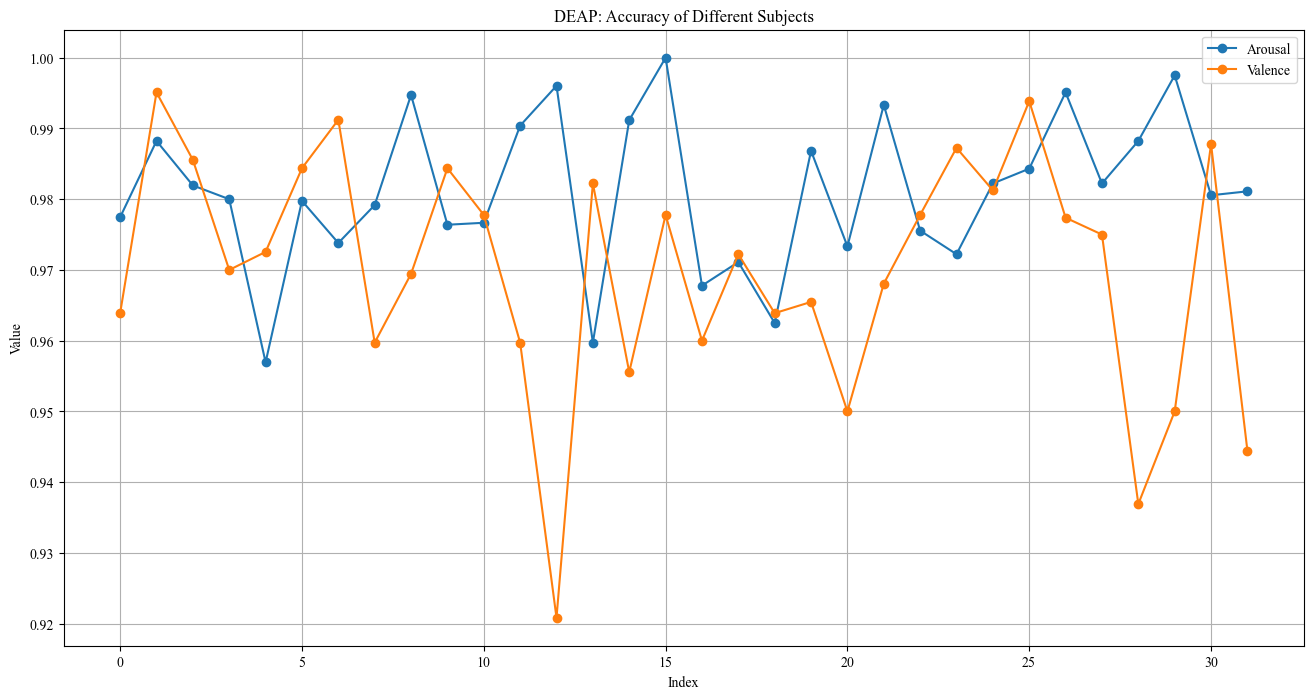

In [28]:
plt.rcParams['font.family']='Times New Roman'
plt.figure(figsize=(16, 8))
plt.plot(arousal_deap_acc_value, marker='o', linestyle='-', label='Arousal')
plt.plot(valence_deap_acc_value, marker='o', linestyle='-', label='Valence')
plt.title("DEAP: Accuracy of Different Subjects")
plt.xlabel("Index", fontname='Times New Roman')
plt.ylabel("Value", fontname='Times New Roman')
plt.legend()
plt.grid(True)
plt.show()

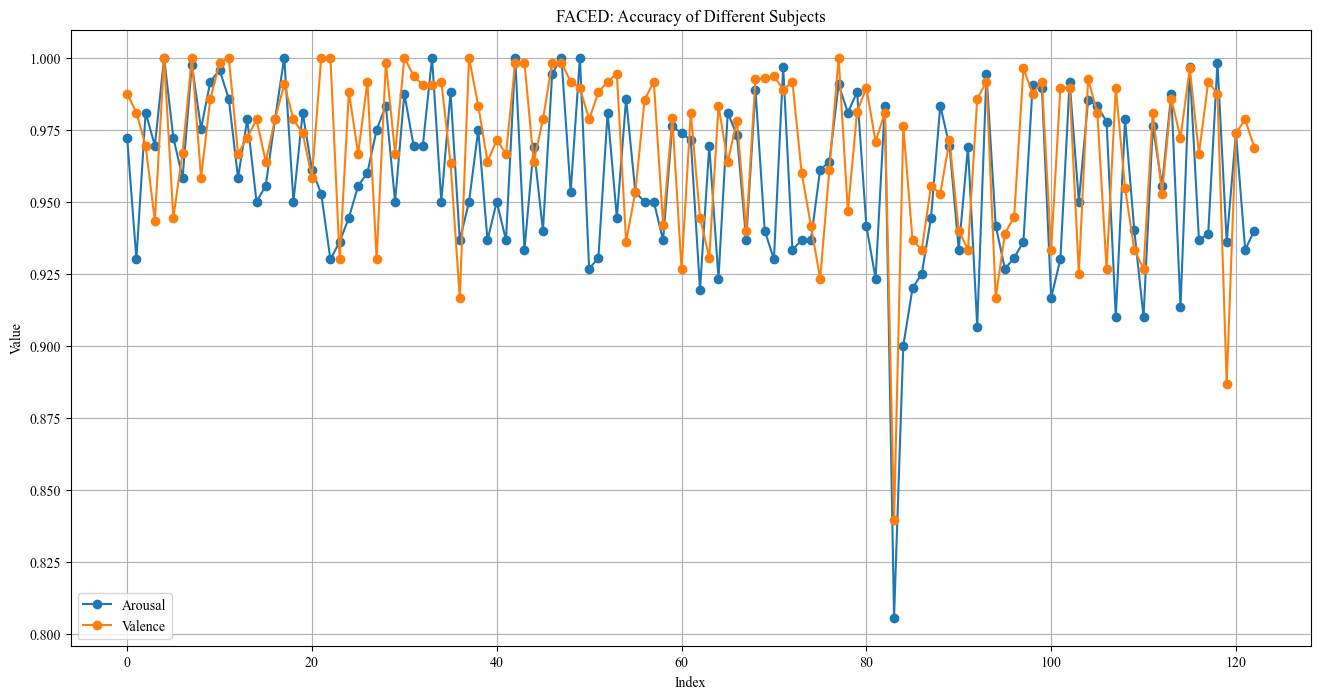

In [29]:
plt.rcParams['font.family']='Times New Roman'
plt.figure(figsize=(16, 8))
plt.plot(arousal_faced_acc_value, marker='o', linestyle='-', label='Arousal')
plt.plot(valence_faced_acc_value, marker='o', linestyle='-', label='Valence')
plt.title("FACED: Accuracy of Different Subjects")
plt.xlabel("Index", fontname='Times New Roman')
plt.ylabel("Value", fontname='Times New Roman')
plt.legend()
plt.grid(True)
plt.show()

In [36]:
fade = np.array(fade)

In [6]:
import seaborn as sns

In [7]:
faced_de_feature = torch.load('/home/sjf/eegall/data/all_8nwrebase_de_features.pt')
labels = torch.load('/home/sjf/eegall/data/all_8nwrelabels.pt')

/tmp/ipykernel_1238263/799205889.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  faced_de_feature = torch.load('/home/sjf/eegall/data/all_8nwrebase_de_features.pt')
/tmp

In [8]:
faced_de_feature.shape

torch.Size([123, 312, 32, 7])

In [9]:
window1 = faced_de_feature[0,0,:,:]
window2 = faced_de_feature[0,15,:,:]
window3 = faced_de_feature[0,30,:,:]

In [10]:
dis_data1 = torch.mean(window1, dim=-1)
dis_data2 = torch.mean(window2, dim=-1)
dis_data3 = torch.mean(window3, dim=-1)

/tmp/ipykernel_1238263/3944672540.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dis_data1, color='blue', label='Time step 1',shade=True)
/tmp/ipykernel_1238263/3944672540.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dis_data2, color='red', label='Time step 2',shade=True)
/tmp/ipykernel_1238263/3944672540.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dis_data3, color='green', label='Time step 3',shade=True)


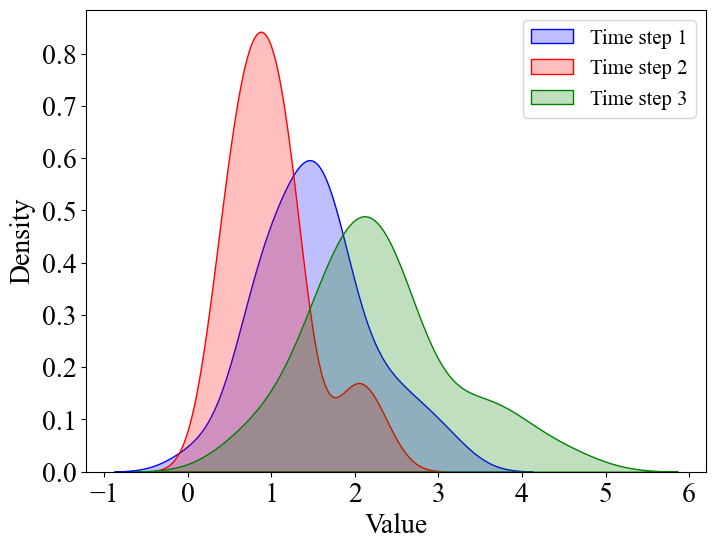

In [11]:
plt.rcParams['font.family']='Times New Roman'
plt.figure(figsize=(8, 6))

# 使用 Seaborn 绘制只包含 KDE 的分布图
sns.kdeplot(dis_data1, color='blue', label='Time step 1',shade=True)
sns.kdeplot(dis_data2, color='red', label='Time step 2',shade=True)
sns.kdeplot(dis_data3, color='green', label='Time step 3',shade=True)
plt.legend(fontsize=15)
plt.xlabel('Value', fontsize=20)  # 设置X轴标签的字体大小
plt.ylabel('Density', fontsize=20)  # 设置Y轴标签的字体大小
plt.xticks(fontsize=20)  # 设置X轴刻度的字体大小
plt.yticks(fontsize=20)  # 设置Y轴刻度的字体大小

plt.savefig('/home/sjf/eegall/dataex/distribution.png',dpi=600)

/tmp/ipykernel_1238263/2785089380.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dis_data1, color='blue', label='Time step 1', shade=True)
/tmp/ipykernel_1238263/2785089380.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dis_data2, color='red', label='Time step 2', shade=True)
/tmp/ipykernel_1238263/2785089380.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dis_data3, color='green', label='Time step 3', shade=True)


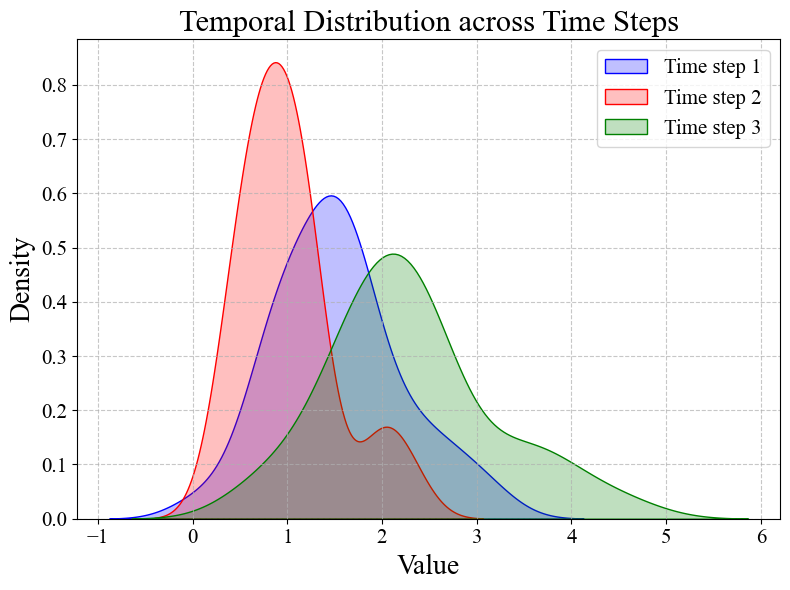

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the font and style
plt.rcParams['font.family'] = 'Times New Roman'

# Set the figure size
plt.figure(figsize=(8, 6))

# KDE plots with different time steps and custom colors
sns.kdeplot(dis_data1, color='blue', label='Time step 1', shade=True)
sns.kdeplot(dis_data2, color='red', label='Time step 2', shade=True)
sns.kdeplot(dis_data3, color='green', label='Time step 3', shade=True)

# Adding a legend
plt.legend(fontsize=15)

# Adding labels and title
plt.xlabel('Value', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.title('Temporal Distribution across Time Steps', fontsize=22)

# Customize tick parameters
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.7)

# Tight layout for better fitting of labels
plt.tight_layout()

# Save the figure
# plt.savefig('/home/sjf/eegall/dataex/distribution.png', dpi=600)

# Show the plot
plt.show()


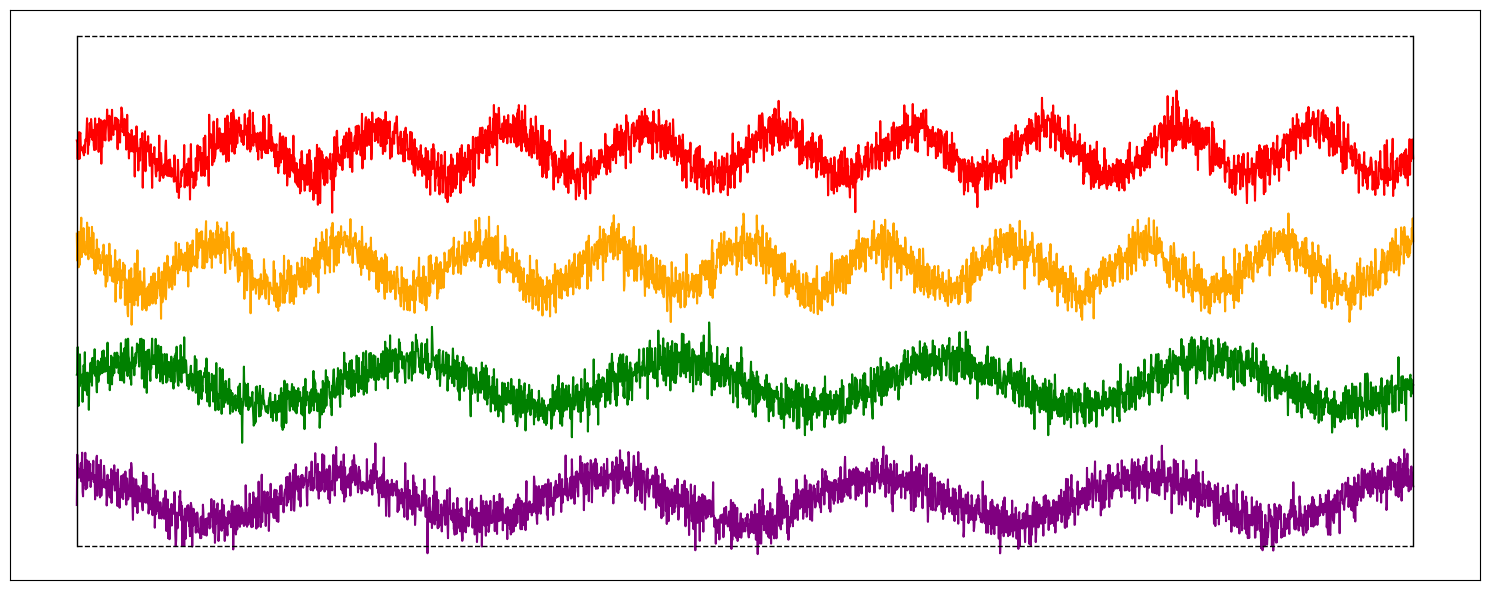

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Simulating EEG signal data (replace this with your actual EEG data)
time = np.linspace(0, 100, 3000)  # Expanding the time axis to 100 seconds
eeg_signal_1 = np.sin(2 * np.pi * 0.1 * time) + 0.5 * np.random.randn(3000)
eeg_signal_2 = np.cos(2 * np.pi * 0.1 * time) + 0.5 * np.random.randn(3000)
eeg_signal_3 = np.sin(2 * np.pi * 0.05 * time) + 0.5 * np.random.randn(3000)
eeg_signal_4 = np.cos(2 * np.pi * 0.05 * time) + 0.5 * np.random.randn(3000)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(15, 6))

# Apply vertical offsets to separate signals more prominently
ax.plot(time, eeg_signal_1 + 15, label='Signal 1', color='red', linewidth=1.5)
ax.plot(time, eeg_signal_2 + 10, label='Signal 2', color='orange', linewidth=1.5)
ax.plot(time, eeg_signal_3 + 5, label='Signal 3', color='green', linewidth=1.5)
ax.plot(time, eeg_signal_4 + 0, label='Signal 4', color='purple', linewidth=1.5)

# Adding a 3D-like box frame by manually drawing lines
ax.plot([0, 100], [20, 20], color='black', linewidth=1, linestyle='--')  # Top line
ax.plot([0, 100], [-2, -2], color='black', linewidth=1, linestyle='--')  # Bottom line
ax.plot([0, 0], [-2, 20], color='black', linewidth=1)  # Left vertical line
ax.plot([100, 100], [-2, 20], color='black', linewidth=1)  # Right vertical line

# Labeling axes for the "3D effect" (like t and t+1)
# ax.text(5, 22, r"$t$", fontsize=40, color="black", fontweight='bold')
# ax.text(95, 22, r"$t+1$", fontsize=40, color="black", fontweight='bold')

# Customize the graph appearance
# ax.set_xlabel('Time (s)', fontsize=40, fontweight='bold')
# ax.set_yticks([])  # Hide Y-axis ticks for cleaner appearance
# ax.set_title('Spatial Temporal Dependencies (EEG Signals)', fontsize=40, fontweight='bold')
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
# Adjust the limits to emphasize separation and horizontal length
# ax.set_xlim(0, 100)
# ax.set_ylim(-5, 25)

# Save the figure if needed
plt.savefig('/home/sjf/eegall/results/signals.png',dpi=1000)
plt.tight_layout()
plt.show()


In [8]:
data = [window1,window2]

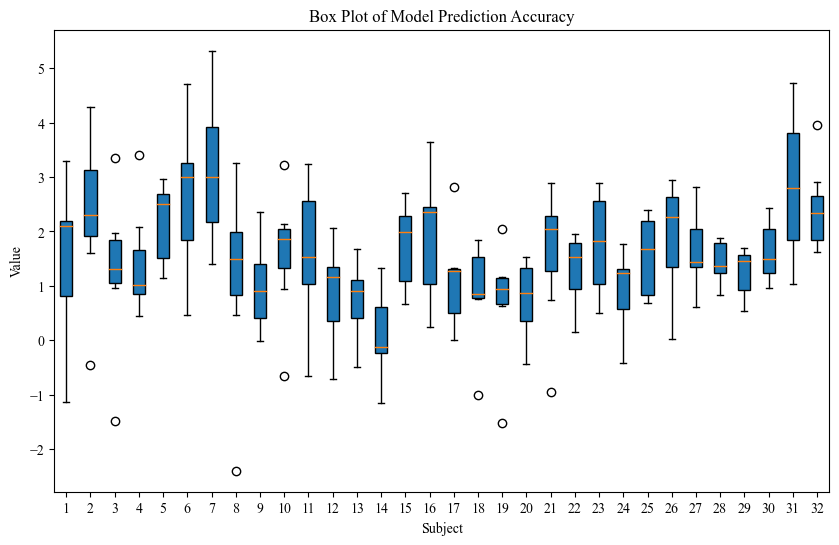

In [9]:
plt.rcParams['font.family']='Times New Roman'
plt.figure(figsize=(10, 6))
plt.boxplot(window1, vert=True, patch_artist=True)

# 设置标题和标签
plt.title("Box Plot of Model Prediction Accuracy")
plt.xlabel('Subject')
plt.ylabel("Value", fontname='Times New Roman')

# 显示图形
plt.show()

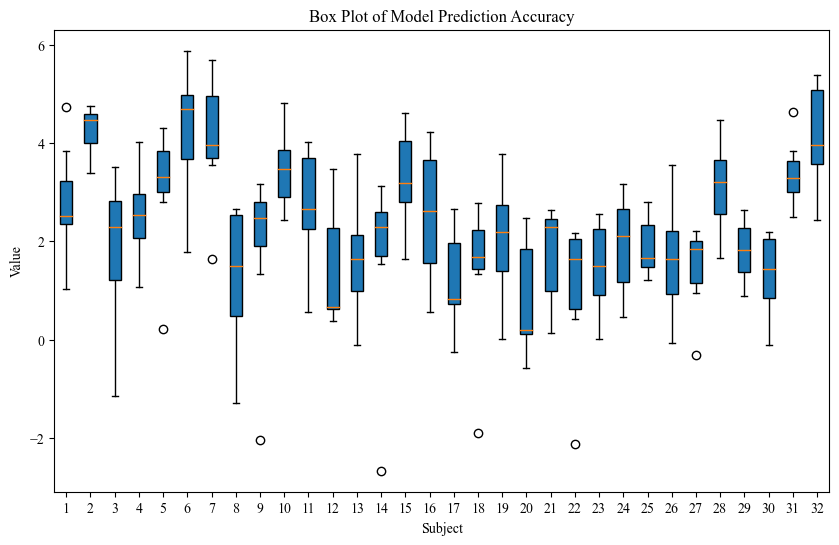

In [121]:
plt.rcParams['font.family']='Times New Roman'
plt.figure(figsize=(10, 6))
plt.boxplot(window2, vert=True, patch_artist=True)

# 设置标题和标签
plt.title("Box Plot of Model Prediction Accuracy")
plt.xlabel('Subject')
plt.ylabel("Value", fontname='Times New Roman')

# 显示图形
plt.show()

In [122]:
data = np.array(data)

In [5]:
import matplotlib.patches as mpatches

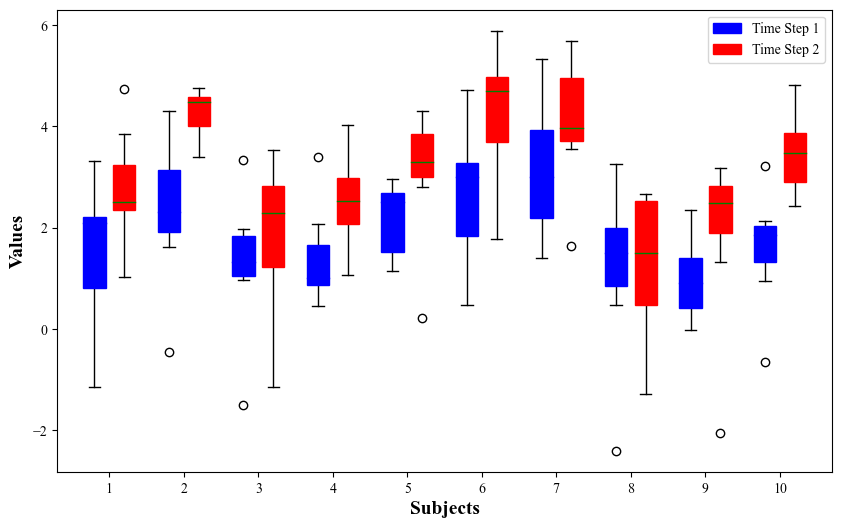

In [127]:
# 创建一个画布
plt.figure(figsize=(10, 6))

# 定义偏移量，用于将不同时间步的数据错开显示
offset = 0.2
positions_time1 = np.arange(1, 11) - offset  # 时间步1的位置
positions_time2 = np.arange(1, 11) + offset  # 时间步2的位置

# 绘制时间步1的箱型图（对于每个特征）
plt.boxplot([data[0, i, :] for i in range(10)], positions=positions_time1, widths=0.3, patch_artist=True,
            boxprops=dict(facecolor='blue', color='blue'), medianprops=dict(color='blue'))

# 绘制时间步2的箱型图（对于每个特征）
plt.boxplot([data[1, i, :] for i in range(10)], positions=positions_time2, widths=0.3, patch_artist=True,
            boxprops=dict(facecolor='red', color='red'), medianprops=dict(color='green'))

# 设置 X 轴的刻度和标签
plt.xticks(np.arange(1, 11), [f'{i+1}' for i in range(10)])

# 添加标题和标签
# plt.title('Boxplots for Two Time Steps')
plt.xlabel('Subjects', fontweight='bold', fontsize=14)
plt.ylabel('Values', fontweight='bold', fontsize=14)

# 添加图例
time1_patch = mpatches.Patch(color='blue', label='Time Step 1')
time2_patch = mpatches.Patch(color='red', label='Time Step 2')

# 添加图例，使用自定义句柄
plt.legend(handles=[time1_patch, time2_patch], loc='upper right')
plt.savefig('/home/sjf/eegall/results/timeheter.jpg')
# 显示图像
plt.show()

In [1]:
import mne
from mne.preprocessing import (ICA, create_eog_epochs, create_ecg_epochs, corrmap)
from mne.time_frequency import psd_welch
from mne.decoding import cross_val_multiscore

import os
import time
import pickle
import pandas as pd
import numpy as np

from scipy import signal
from scipy.signal import welch
from scipy.integrate import simps
from scipy.stats import f_oneway

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import model_selection
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve

from fooof import FOOOFGroup
from fooof.bands import Bands
from fooof.analysis import get_band_peak_fg
from fooof.plts.spectra import plot_spectrum

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import torch

/tmp/ipykernel_1238671/3859341648.py:29: DeprecationWarning: 
The `fooof` package is being deprecated and replaced by the `specparam` (spectral parameterization) package.
This version of `fooof` (1.1) is fully functional, but will not be further updated.
New projects are recommended to update to using `specparam` (see Changelog for details).
  from fooof import FOOOFGroup


In [2]:
eeg_channels = np.array(["Fp1", "AF3", "F3", "F7", "FC5", "FC1", "C3", "T7", "CP5", "CP1", "P3", "P7", "PO3", "O1", "Oz", "Pz", "Fp2", "AF4", "Fz", "F4", "F8", "FC6", "FC2", "Cz", "C4", "T8", "CP6", "CP2", "P4", "P8", "PO4", "O2"])
peripheral_channels = np.array(["hEOG", "vEOG", "zEMG", "tEMG", "GSR", "Respiration belt", "Plethysmograph", "Temperature"])

In [3]:
all_deap_arousal_combined = torch.load('/home/sjf/eegall/nolimits/DEAP/combinedall.pt', map_location=torch.device('cpu'))
time_fourier_out = torch.load('/home/sjf/eegall/nolimits/DEAP/explainoutput.pt', map_location=torch.device('cpu'))
spatial_temporal = torch.load('/home/sjf/eegall/nolimits/DEAP/spatialtemporal.pt', map_location=torch.device('cpu'))
arousal_val_labels = torch.load('/home/sjf/eegall/nolimits/DEAP/val_labels.pt', map_location=torch.device('cpu'))

In [4]:
all_deap_valence_combined = torch.load('/home/sjf/eegall/nolimits/DEAP/valence_combinedall.pt', map_location=torch.device('cpu'))
valence_time_fourier_out = torch.load('/home/sjf/eegall/nolimits/DEAP/valence_explainoutput.pt', map_location=torch.device('cpu'))
valence_spatial_temporal = torch.load('/home/sjf/eegall/nolimits/DEAP/valence_spatialtemporal.pt', map_location=torch.device('cpu'))
valence_val_labels = torch.load('/home/sjf/eegall/nolimits/DEAP/valence_val_labels.pt', map_location=torch.device('cpu'))

In [5]:
print(all_deap_arousal_combined.shape)
print(time_fourier_out.shape)
print(spatial_temporal.shape)
print(arousal_val_labels.shape)

torch.Size([15, 64])
torch.Size([15, 32, 32])
torch.Size([15, 64])
torch.Size([91])


In [6]:
print(all_deap_valence_combined.shape)
print(valence_time_fourier_out.shape)
print(valence_spatial_temporal.shape)
print(valence_val_labels.shape)

torch.Size([12, 64])
torch.Size([12, 32, 32])
torch.Size([12, 64])
torch.Size([76])


In [7]:
data_deap_arousal = all_deap_arousal_combined.reshape(15, 32, 2)
data_deap_arousal = torch.mean(data_deap_arousal,axis=2)
time_fourier_arousal = torch.mean(time_fourier_out,axis=2)
spatial_temporal_arousal = spatial_temporal.reshape(15, 32,2)
spatial_temporal_arousal = torch.mean(spatial_temporal_arousal,axis=2)

In [8]:
data_deap_valence = all_deap_valence_combined.reshape(12,32,2)
data_deap_valence = torch.mean(data_deap_valence,axis=2)
time_fourier_valence = torch.mean(valence_time_fourier_out,axis=2)
spatial_temporal_valence = valence_spatial_temporal.reshape(12, 32,2)
spatial_temporal_valence = torch.mean(spatial_temporal_valence,axis=2)

In [9]:
time_fourier_arousal.shape

torch.Size([15, 32])

In [10]:
data_deap_valence.shape

torch.Size([12, 32])

In [11]:
def draw_brain_regions(band_data,time_pin,info):
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['font.size'] = 14  # 设置字体大小
    plt.rcParams['axes.labelweight'] = 'bold'  # 设置标签加粗
    plt.rcParams['axes.titlesize'] = 16  # 设置标题字体大小
    plt.rcParams['axes.titleweight'] = 'bold'  # 设置标题加粗
    plt.rcParams['xtick.labelsize'] = 12  # 设置 x 轴刻度标签字体大小
    plt.rcParams['ytick.labelsize'] = 12  # 设置 y 轴刻度标签字体大小
    spatial_data = band_data.transpose(1,0)
    plt.rcParams['font.family']='Times New Roman'
    # Positive
    evData_th = mne.EvokedArray(spatial_data, info)
    evData_th.plot_topomap(times=time_pin,ch_type='eeg',units='',scalings={'eeg': 1})
    plt.show()
    # plt.savefig(file_path,dpi=800)

In [12]:
eeg_data = all_deap_arousal_combined.numpy()

In [13]:
info = mne.create_info(eeg_channels.tolist(), ch_types=32*['eeg'], sfreq=128)
info.set_montage('standard_1020')
raw = mne.io.RawArray(eeg_data, info)

/home/sjf/anaconda3/envs/brain/lib/python3.9/site-packages/mne/io/open.py:160: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dirpos = int(tag.data)
/home/sjf/anaconda3/envs/brain/lib/python3.9/site-packages/mne/io/tag.py:299: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  version=int(np.frombuffer(fid.read(4), dtype=">i4")),
/home/sjf/anaconda3/envs/brain/lib/python3.9/site-packages/mne/io/tag.py:301: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  secs=int(np.frombuf

ValueError: len(data) (15) does not match len(info["ch_names"]) (32)

In [14]:
time_pin=[1,2,3,4,5,6]

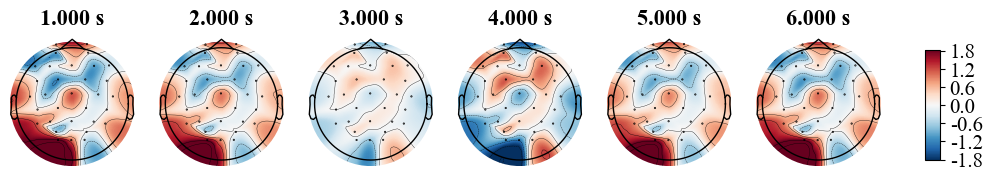

In [15]:
draw_brain_regions(data_deap_arousal,time_pin,info)

In [16]:
arousal_val_labels[-15:-9]

tensor([0, 0, 1, 1, 0, 0])

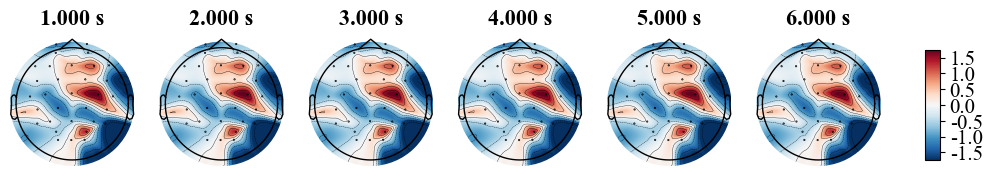

In [17]:
draw_brain_regions(spatial_temporal_arousal,time_pin,info)

In [18]:
time_pin=[0.5,1.5,2.5,3.5,4.5,5.5]

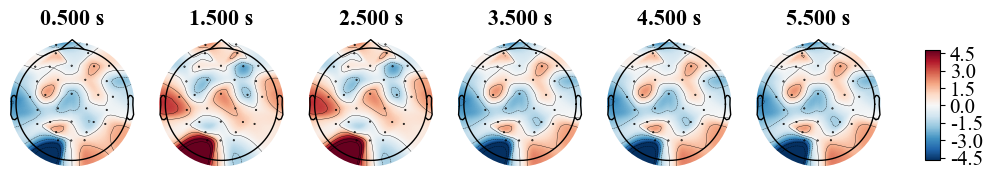

In [19]:
draw_brain_regions(data_deap_valence,time_pin,info)

In [20]:
valence_val_labels[-16:-10]

tensor([1, 1, 0, 0, 1, 0])

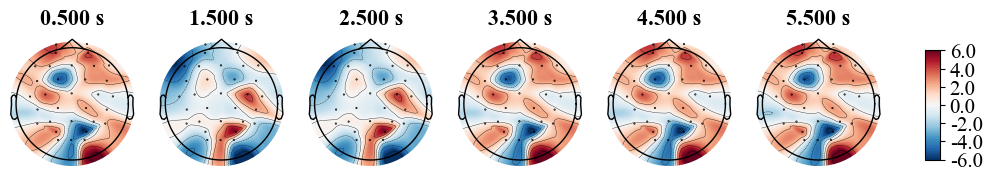

In [21]:
draw_brain_regions(spatial_temporal_valence,time_pin,info)

In [22]:
valence_val_labels

tensor([1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
        1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
        1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
        1, 0, 0, 0])

In [23]:
data_deap_arousal = all_deap_arousal_combined.reshape(15*2, 32)
time_fourier_arousal = torch.mean(time_fourier_out,axis=2)
spatial_temporal_arousal = spatial_temporal.reshape(15*2, 32)

In [5]:
# data1 = torch.load('/home/sjf/eegall/data/all_8nwrebase_de_features.pt')
alpha_data = all_features[:,2,:,:,:]
beta_data = all_features[:,3,:,:,:]
delta_data = all_features[:,0,:,:,:]
theta_data = all_features[:,1,:,:,:]
gamma_data = all_features[:,4,:,:,:]

In [6]:
alpha_eeg_data = []
for i in range (len(alpha_data[0])):
  for j in range (len(eeg_channels)):
    alpha_eeg_data.append(alpha_data[0][i,j])
alpha_eeg_data = np.reshape(alpha_eeg_data, (len(alpha_data[0]), len(eeg_channels), len(alpha_data[0][0,0])))
print(alpha_eeg_data.shape)

(312, 32, 7)


In [24]:
def band_data_select(band1_data,band2_data,band3_data,band4_data,band5_data):
    alpha_eeg_data = []
    beta_eeg_data = []
    delta_eeg_data = []
    theta_eeg_data = []
    gamma_eeg_data = []
    eeg_channels = np.array(["Fp1", "AF3", "F3", "F7", "FC5", "FC1", "C3", "T7", "CP5", "CP1", "P3", "P7", "PO3", "O1", "Oz", "Pz", "Fp2", "AF4", "Fz", "F4", "F8", "FC6", "FC2", "Cz", "C4", "T8", "CP6", "CP2", "P4", "P8", "PO4", "O2"])
    peripheral_channels = np.array(["hEOG", "vEOG", "zEMG", "tEMG", "GSR", "Respiration belt", "Plethysmograph", "Temperature"])
    for i in range(len(band1_data[0])):
        for j in range(len(eeg_channels)):
            alpha_eeg_data.append(band1_data[0][i,j])
            beta_eeg_data.append(band2_data[0][i,j])
            delta_eeg_data.append(band3_data[0][i,j])
            theta_eeg_data.append(band4_data[0][i,j])
            gamma_eeg_data.append(band5_data[0][i,j])
    alpha_eeg_data = np.reshape(alpha_eeg_data, (len(band1_data[0]), len(eeg_channels), len(band1_data[0][0,0])))
    beta_eeg_data = np.reshape(beta_eeg_data, (len(band2_data[0]), len(eeg_channels), len(band2_data[0][0,0])))
    delta_eeg_data = np.reshape(delta_eeg_data, (len(band3_data[0]), len(eeg_channels), len(band3_data[0][0,0])))
    theta_eeg_data = np.reshape(theta_eeg_data, (len(band4_data[0]), len(eeg_channels), len(band4_data[0][0,0])))
    gamma_eeg_data = np.reshape(gamma_eeg_data, (len(band5_data[0]), len(eeg_channels), len(band5_data[0][0,0])))
    return alpha_eeg_data,beta_eeg_data,delta_eeg_data,theta_eeg_data,gamma_eeg_data

In [8]:
alpha_eeg_data,beta_eeg_data,delta_eeg_data,theta_eeg_data,gamma_eeg_data = band_data_select(alpha_data,beta_data,delta_data,theta_data,gamma_data)

In [9]:
alpha_eeg_data.shape

(312, 32, 7)

In [25]:
def draw_brain_regions(band_data,time_pin,info,filename):
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['font.size'] = 14  # 设置字体大小
    plt.rcParams['axes.labelweight'] = 'bold'  # 设置标签加粗
    plt.rcParams['axes.titlesize'] = 16  # 设置标题字体大小
    plt.rcParams['axes.titleweight'] = 'bold'  # 设置标题加粗
    plt.rcParams['xtick.labelsize'] = 12  # 设置 x 轴刻度标签字体大小
    plt.rcParams['ytick.labelsize'] = 12  # 设置 y 轴刻度标签字体大小
    spatial_data = np.mean(band_data, axis=2).transpose(1,0)
    plt.rcParams['font.family']='Times New Roman'
    # Positive
    evData_th = mne.EvokedArray(spatial_data, info)
    evData_th.plot_topomap(times=time_pin,ch_type='eeg',units='',scalings={'eeg': 1})
    file_path = '/home/sjf/eegall/dataex/'+filename+'.png'
    plt.show()
    # plt.savefig(file_path,dpi=800)

In [26]:
info = mne.create_info(eeg_channels.tolist(), ch_types=32*['eeg'], sfreq=128)
info.set_montage('standard_1020')

/home/sjf/anaconda3/envs/brain/lib/python3.9/site-packages/mne/io/open.py:160: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dirpos = int(tag.data)
/home/sjf/anaconda3/envs/brain/lib/python3.9/site-packages/mne/io/tag.py:299: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  version=int(np.frombuffer(fid.read(4), dtype=">i4")),
/home/sjf/anaconda3/envs/brain/lib/python3.9/site-packages/mne/io/tag.py:301: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  secs=int(np.frombuf

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, AF3, F3, F7, FC5, FC1, C3, T7, CP5, CP1, P3, P7, PO3, O1, ...
 chs: 32 EEG
 custom_ref_applied: False
 dig: 35 items (3 Cardinal, 32 EEG)
 highpass: 0.0 Hz
 lowpass: 64.0 Hz
 meas_date: unspecified
 nchan: 32
 projs: []
 sfreq: 128.0 Hz
>

In [34]:
time_pin = []
for i in range(1,24):
    time_pin.append(i/10)

Alpha Brain Region



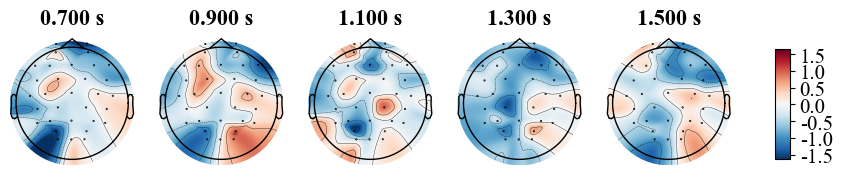

Beta Brain Region



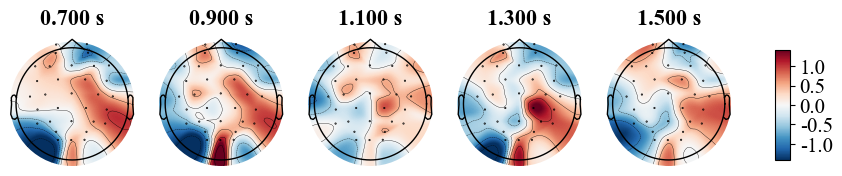

Delta Brain Region



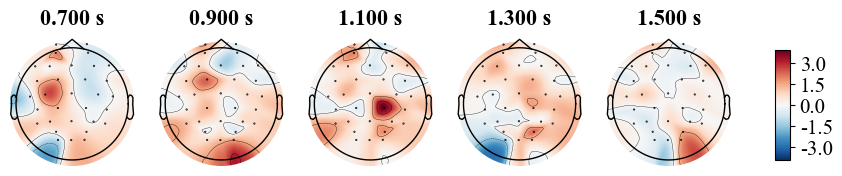

Theta Brain Region



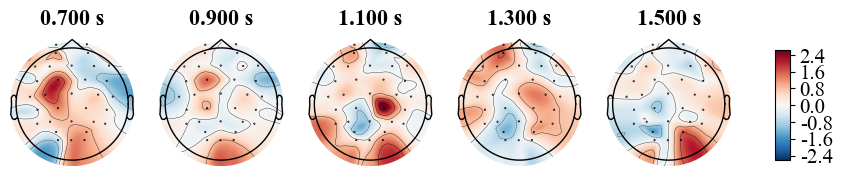

Gamma Brain Region



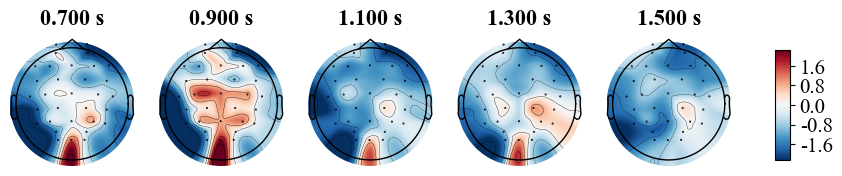

In [35]:
time_pin=[0.7, 0.9, 1.1, 1.3, 1.5]
print("Alpha Brain Region\n")
# draw_brain_regions(alpha_eeg_data,10,info)
draw_brain_regions(alpha_eeg_data,time_pin,info,filename='alpha')
print("Beta Brain Region\n")
# draw_brain_regions(beta_eeg_data,10,info)
draw_brain_regions(beta_eeg_data,time_pin,info,filename='beta')
print("Delta Brain Region\n")
# draw_brain_regions(delta_eeg_data,10,info)
draw_brain_regions(delta_eeg_data,time_pin,info,filename='delta')
print("Theta Brain Region\n")
# draw_brain_regions(theta_eeg_data,10,info)
draw_brain_regions(theta_eeg_data,time_pin,info,filename='theta')
print("Gamma Brain Region\n")
# draw_brain_regions(gamma_eeg_data,10,info)
draw_brain_regions(gamma_eeg_data,time_pin,info,filename='gamma')

In [18]:
import matplotlib

In [30]:
time_fourier_out2.shape

torch.Size([15, 32, 32])

In [20]:
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.serif'] = ['Times New Roman']

In [78]:
time_fourier_out1 = torch.load('/home/sjf/eegall/dataex/99timefourier.pt')
time_fourier_out2 = torch.load('/home/sjf/eegall/nolimits/FACED/valence_explainoutput.pt', map_location=torch.device('cpu'))
time_fourier_out3 = torch.load('/home/sjf/eegall/nolimits/FACED/99timefourier.pt')

In [95]:
data = time_fourier_out2.detach()

In [91]:
data = time_fourier_out1

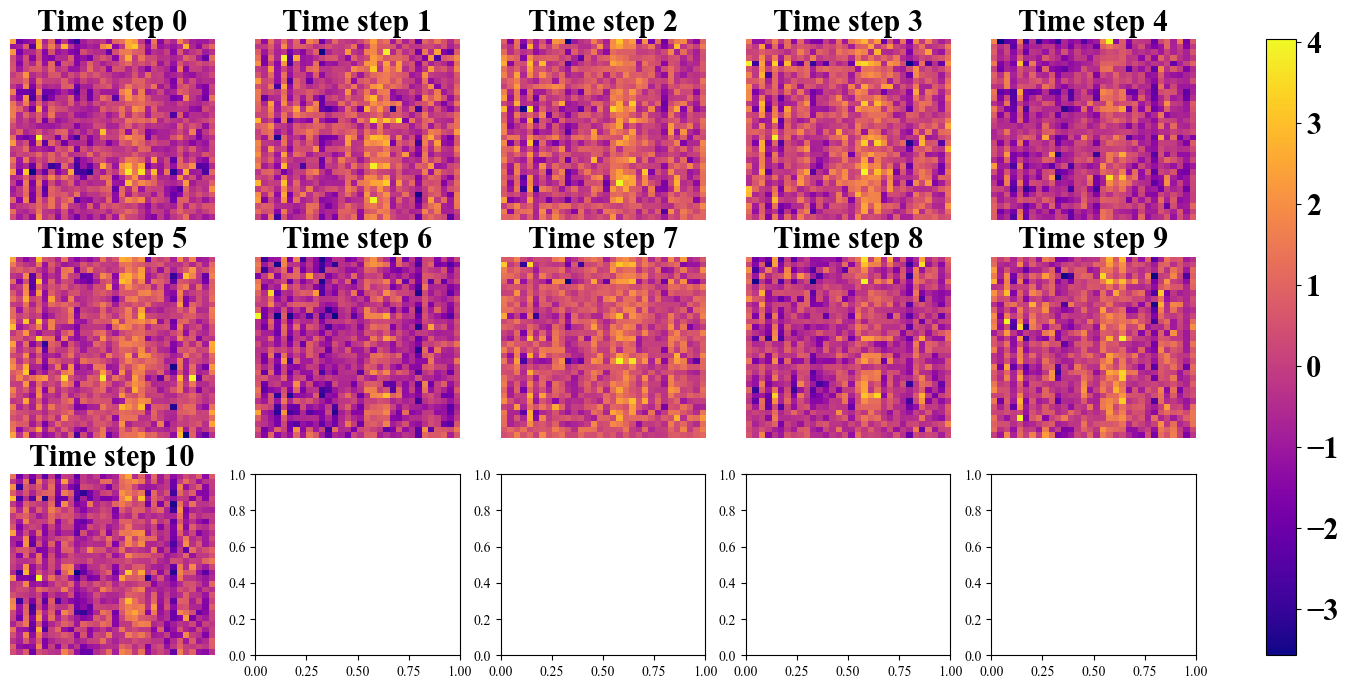

In [96]:
plt.rcParams['font.family']='Times New Roman'
# 设置图形大小和子图网格
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(18, 8))

# 确保子图的数量与时间步数一致
axes = axes.flatten()

# 绘制每个时间步的热力图
for i in range(11):
    ax = axes[i]
    cax = ax.imshow(data[i], aspect='auto', cmap='plasma', origin='lower')
    ax.set_title(f'Time step {i}',fontweight='bold',fontsize=22)
    ax.axis('off')

# 添加一个颜色条
cbar = fig.colorbar(cax, ax=axes, orientation='vertical', fraction=.1)
for label in cbar.ax.get_yticklabels():
    label.set_fontsize(22)  # 设置字体大小
    label.set_fontweight('bold')



# plt.savefig('/home/sjf/eegall/results/convres.jpg',dpi=800)

plt.show()
# 创建新的图形来保存 colorbar
fig_cbar, ax_cbar = plt.subplots(figsize=(3, 8))  # 设置颜色条的大小
fig_cbar.subplots_adjust(left=0.3, right=0.7)  # 调整颜色条位置
cbar = fig_cbar.colorbar(cax, ax=ax_cbar, orientation='vertical')  # 创建单独的颜色条
for label in cbar.ax.get_yticklabels():
    label.set_fontsize(30)  # 设置字体大小
    label.set_fontweight('bold')

# 保存颜色条
fig_cbar.savefig('/home/sjf/eegall/dataex/colorbar.jpg', dpi=1000)

plt.close(fig_cbar)  # 关闭单独的 colorbar 图像

In [7]:
eeg_channels = np.array(["Fp1", "AF3", "F3", "F7", "FC5", "FC1", "C3", "T7", "CP5", "CP1", "P3", "P7", "PO3", "O1", "Oz", "Pz", "Fp2", "AF4", "Fz", "F4", "F8", "FC6", "FC2", "Cz", "C4", "T8", "CP6", "CP2", "P4", "P8", "PO4", "O2"])
peripheral_channels = np.array(["hEOG", "vEOG", "zEMG", "tEMG", "GSR", "Respiration belt", "Plethysmograph", "Temperature"])

In [323]:
time_fourier_out = torch.load('/home/sjf/eegall/nolimits/DEAP/explainoutput.pt', map_location=torch.device('cpu'))

In [324]:
valence_time_fourier_out = torch.load('/home/sjf/eegall/nolimits/DEAP/valence_explainoutput.pt', map_location=torch.device('cpu'))

In [325]:
valence_time_fourier_out = np.array(valence_time_fourier_out)
time_fourier_out = np.array(time_fourier_out)

In [326]:
print(np.max(np.mean(valence_time_fourier_out,axis=-1)))
print(np.max(np.min(valence_time_fourier_out,axis=-1)))
print(np.median(np.max(valence_time_fourier_out,axis=-1)))
# print(np.std(valence_time_fourier_out,axis=-1))
print(np.max(np.median(valence_time_fourier_out,axis=-1)))

1.5334374e-26
-3.462759e-26
9.73676e-26
1.146503e-26


In [327]:
print(np.max(np.mean(time_fourier_out,axis=-1)))
print(np.max(np.min(time_fourier_out,axis=-1)))
print(np.max(np.max(time_fourier_out,axis=-1)))
print(np.min(np.max(time_fourier_out,axis=-1)))
print(np.mean(np.max(time_fourier_out,axis=-1)))
print(np.median(np.max(time_fourier_out,axis=-1)))
# print(np.std(valence_time_fourier_out,axis=-1))
print(np.max(np.median(time_fourier_out,axis=-1)))

0.047660097
-0.13859563
2.0393271
0.12033387
0.6945578
0.6465699
0.14695242


In [310]:
(2.0393271+0.12033387)/2

1.079830485

In [8]:
sdr_acc = [1.74, 1.07, 2.70, 2.92]
sdr_fs = [1.96, 1.08, 17.4, 12.49]
dggn_acc = [2.23, 2.56, 3.26, 3.99]
dggn_fs = [3.01, 2.74, 21.43, 20.83]

In [9]:
sdr_only_gcn = [5.78,4.11,4.95,4.85]
sdr_gcn_noft = [7.64, 7.71, 23.38, 22.57]
sdr_only_tse = [9.91,8.02,13.64,13.94]

In [10]:
cross_data_vsdr = [0.46, 2.28]
cross_data_vdggn = [1.86,3.32]

In [11]:
x = np.arange(len(sdr_acc))

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager as fm

/tmp/ipykernel_41542/760105744.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(yticks2, fontsize=20, fontweight='bold')
/tmp/ipykernel_41542/760105744.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticks, fontsize=20, fontweight='bold')


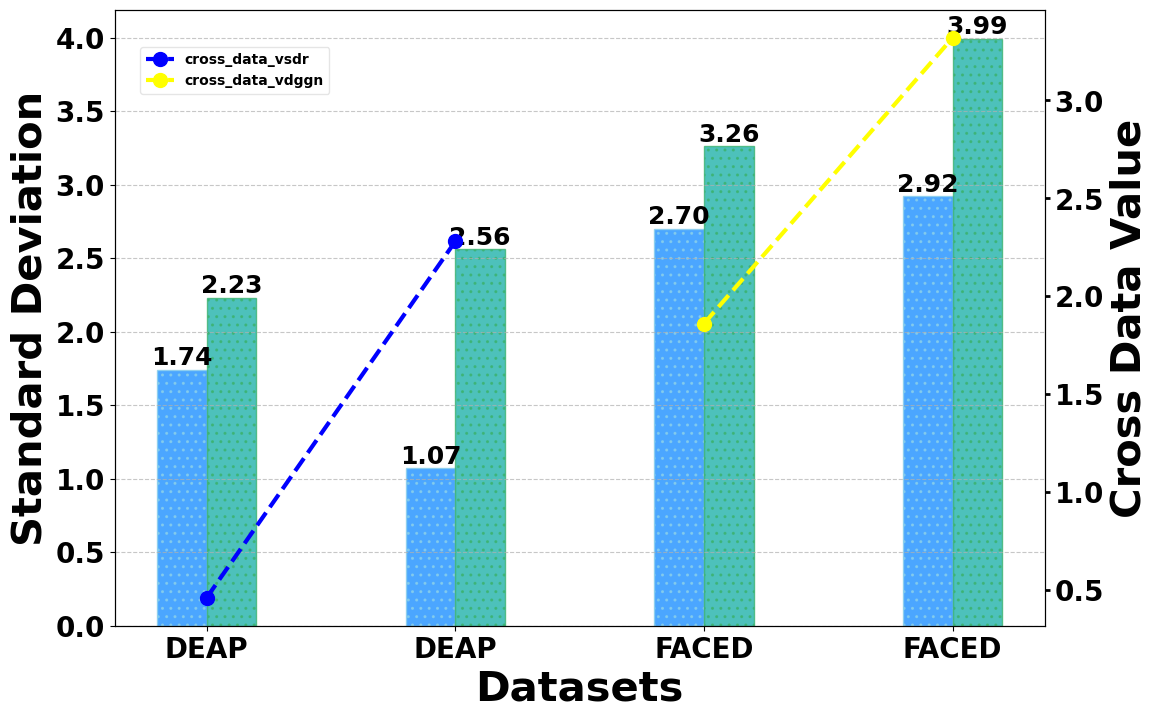

In [13]:
n = len(sdr_acc)

# 定义x轴位置
x = np.arange(n)

# 设置柱状图宽度
width = 0.2

# 创建图形
fig, ax = plt.subplots(figsize=(12, 8))

# 绘制四组柱状图
bars1 = ax.bar(x -  0.5* width, sdr_acc, width, label='SDR Accuracy', color='dodgerblue', alpha=0.8, edgecolor='skyblue',hatch='..')
bars2 = ax.bar(x +  0.5* width, dggn_acc, width, label='DGGN Accuracy', color='lightseagreen', edgecolor='mediumseagreen',alpha=0.8, hatch='..')

ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.bar_label(bars1, fmt='%.2f', fontsize=18, fontweight='bold', color='black')
ax.bar_label(bars2, fmt='%.2f', fontsize=18, fontweight='bold', color='black')

ax2 = ax.twinx()
x1 = [0, 1]  # 对应于 x 轴的位置
x2 = [2, 3]
# 绘制直线
line1 = ax2.plot(x1, cross_data_vsdr, label='cross_data_vsdr', color='blue', marker='o', markersize=10, linewidth=3, linestyle='--')
# line2 = ax2.plot(x, cross_data_asdr, label='cross_data_asdr', color='red', marker='o', markersize=10, linewidth=3, linestyle='--')
line3 = ax2.plot(x2, cross_data_vdggn, label='cross_data_vdggn', color='yellow', marker='o', markersize=10, linewidth=3, linestyle='--')
# line4 = ax2.plot(x, cross_data_adggn, label='cross_data_adggn', color='green', marker='o', markersize=10, linewidth=3, linestyle='--')


# line1 = ax2.plot(x, cross_data_sdr, label='SDR Cross Data', color='blue', marker='o', markersize=10, linewidth=3, linestyle='--')
# line2 = ax2.plot(x_cross, cross_data_dggn, label='DGGN Cross Data', color='green', marker='s', markersize=10, linewidth=3, linestyle='--')

ax2.set_ylabel('Cross Data Value', fontsize=30, fontweight='bold')
ax2.tick_params(axis='y', labelsize=20, labelcolor='black', width=2)
yticks2 = ax2.get_yticks()
ax2.set_yticklabels(yticks2, fontsize=20, fontweight='bold')

# 设置x轴标签和标题
ax.set_xlabel('Datasets', fontsize=30,fontweight='bold')
ax.set_ylabel('Standard Deviation',fontsize=30,fontweight='bold')

ax.set_xticks(x)  # 设置x轴刻度
ax.set_xticklabels(['DEAP','DEAP','FACED','FACED'],fontweight='bold',fontsize=20)  # 自定义x轴标签
yticks = ax.get_yticks()
ax.set_yticklabels(yticks, fontsize=20, fontweight='bold')
ax2.legend(loc='upper left', bbox_to_anchor=(0.02, 0.95), ncol=1, fontsize=30, prop={'weight': 'bold'}, framealpha=0.5)
# plt.savefig('/home/sjf/eegall/dataex/stdcom.png',dpi=800)

/tmp/ipykernel_41542/1511578741.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticks, fontsize=20, fontweight='bold')


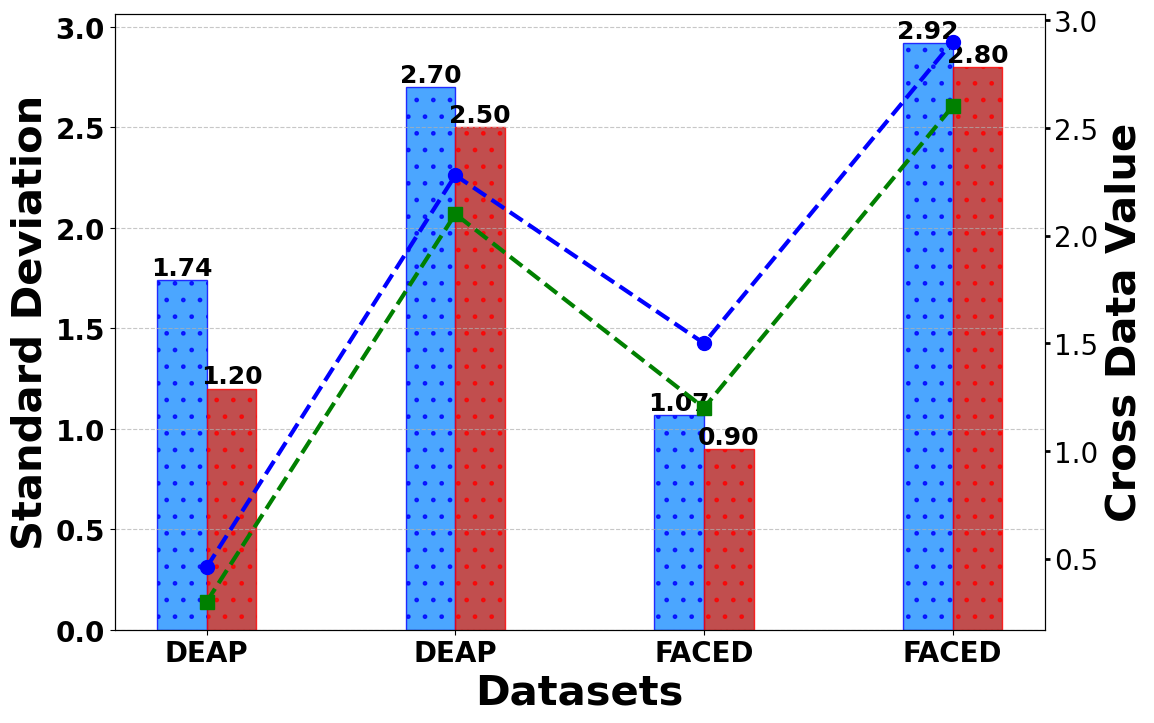

In [14]:
n = len(sdr_acc)  # 取sdr_acc数据长度作为x轴长度
x = np.arange(n)  # x轴位置
width = 0.2  # 设置柱状图宽度

# 定义柱状图数据
sdr_acc = [1.74, 2.70, 1.07, 2.92]
dggn_acc = [1.20, 2.50, 0.90, 2.80]

# 定义直线数据
cross_data_sdr = [0.46, 2.28, 1.50, 2.90]
cross_data_dggn = [0.30, 2.10, 1.20, 2.60]

# 创建图形
fig, ax = plt.subplots(figsize=(12, 8))

# 绘制四组柱状图
bars1 = ax.bar(x - 0.5 * width, sdr_acc, width, label='SDR Accuracy', color='dodgerblue', alpha=0.8, edgecolor='blue', hatch='.')
bars2 = ax.bar(x + 0.5 * width, dggn_acc, width, label='DGGN Accuracy', color='firebrick', edgecolor='red', alpha=0.8, hatch='.')

# 显示柱子上的数值
ax.bar_label(bars1, fmt='%.2f', fontsize=18, fontweight='bold', color='black')
ax.bar_label(bars2, fmt='%.2f', fontsize=18, fontweight='bold', color='black')

# 设置x轴标签和标题
ax.set_xlabel('Datasets', fontsize=30, fontweight='bold')
ax.set_ylabel('Standard Deviation', fontsize=30, fontweight='bold')

# 设置x轴刻度
ax.set_xticks(x)
ax.set_xticklabels(['DEAP', 'DEAP', 'FACED', 'FACED'], fontweight='bold', fontsize=20)

# 设置y轴刻度样式
yticks = ax.get_yticks()
ax.set_yticklabels(yticks, fontsize=20, fontweight='bold')

# 显示网格线
ax.grid(axis='y', linestyle='--', alpha=0.7)

# 创建次坐标轴
ax2 = ax.twinx()  # 创建共享x轴的次坐标轴

# 绘制两条直线
line1 = ax2.plot(x, cross_data_sdr, label='SDR Cross Data', color='blue', marker='o', markersize=10, linewidth=3, linestyle='--')
line2 = ax2.plot(x, cross_data_dggn, label='DGGN Cross Data', color='green', marker='s', markersize=10, linewidth=3, linestyle='--')

# 设置次坐标轴的y轴标签
ax2.set_ylabel('Cross Data Value', fontsize=30, fontweight='bold')
ax2.tick_params(axis='y', labelsize=20, labelcolor='black', width=2)

# 显示图例（包含柱状图和直线图）
# lines = bars1 + bars2 + line1 + line2
# labels = [bar.get_label() for bar in lines]
# ax2.legend(lines, labels, prop={'size': 20, 'weight': 'bold'})

# 显示图形
plt.show()

/tmp/ipykernel_41542/1488997213.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticks, fontsize=20, fontweight='bold',color='#00abac')
/tmp/ipykernel_41542/1488997213.py:66: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(yticks2, fontsize=20, fontweight='bold',color='#ff8000')


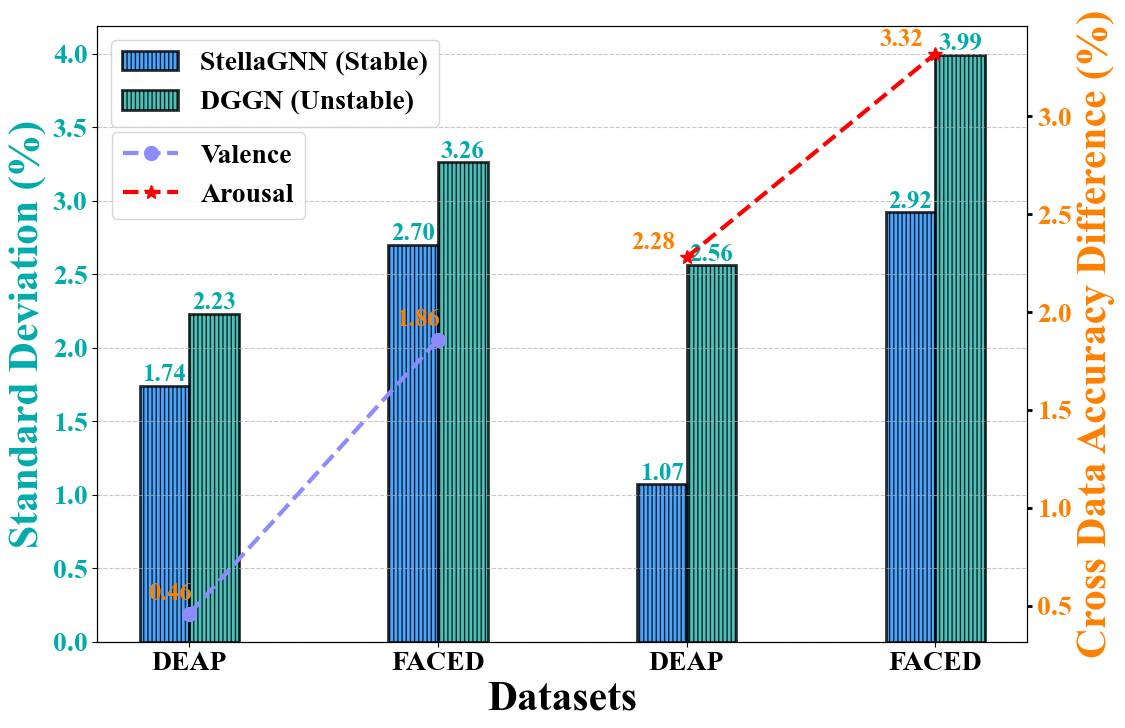

In [17]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Times New Roman'
sdr_acc = [1.74, 2.70, 1.07, 2.92]
dggn_acc = [2.23, 3.26, 2.56, 3.99]


cross_data_vsdr = [0.46, 1.86]
cross_data_asdr= [2.28, 3.32]

n = len(sdr_acc)

# 定义x轴位置
x = np.arange(n)

# 设置柱状图宽度
width = 0.2

# 创建图形
fig, ax = plt.subplots(figsize=(12, 8))

# 绘制四组柱状图
bars1 = ax.bar(x - 0.5 * width, sdr_acc, width, label='StellaGNN (Stable)', color='dodgerblue', alpha=0.8, edgecolor='black', linewidth=2, hatch='||||')
bars2 = ax.bar(x + 0.5 * width, dggn_acc, width, label='DGGN (Unstable)', color='lightseagreen', edgecolor='black', linewidth=2, alpha=0.8, hatch='||||')

# 绘制柱状图标签
ax.bar_label(bars1, fmt='%.2f', fontsize=18, fontweight='bold', color='#00abac')
ax.bar_label(bars2, fmt='%.2f', fontsize=18, fontweight='bold', color='#00abac')

# 设置x轴和y轴标签、标题
ax.set_xlabel('Datasets', fontsize=30, fontweight='bold')
ax.set_ylabel('Standard Deviation (%)', fontsize=30, fontweight='bold',color='#00abac')

# 设置x轴刻度和标签
ax.set_xticks(x)
ax.set_xticklabels(['DEAP', 'FACED', 'DEAP', 'FACED'], fontweight='bold', fontsize=20)

# y轴刻度和标签设置
yticks = ax.get_yticks()
ax.set_yticklabels(yticks, fontsize=20, fontweight='bold',color='#00abac')

# 添加网格线
ax.grid(axis='y', linestyle='--', alpha=0.7)

# 创建右y轴
ax2 = ax.twinx()

# 分段绘制折线图
# 第一段: 对应 DEAP 数据 (修改 y 值长度为 4)
x1 = [0, 1]  # 只绘制前两个点
line1 = ax2.plot(x1, cross_data_vsdr, label='Valence', color='#8e8bfe', marker='o', markersize=10, linewidth=3, linestyle='--')
for i, (x, y) in enumerate(zip(x1, cross_data_vsdr)):
    ax2.annotate(f'{y:.2f}', (x, y), textcoords="offset points", xytext=(-30, 10), ha='left', fontsize=18, fontweight='bold', color='#ff8000')

# 第二段: 对应 FACED 数据 (修改 y 值长度为 4)
x2 = [2, 3]  # 只绘制后两个点
line3 = ax2.plot(x2, cross_data_asdr, label='Arousal', color='#ff0000', marker='*', markersize=10, linewidth=3, linestyle='--')
for i, (x, y) in enumerate(zip(x2, cross_data_asdr)):
    ax2.annotate(f'{y:.2f}', (x, y), textcoords="offset points", xytext=(-40, 6), ha='left', fontsize=18, fontweight='bold', color='#ff8000')

# 右y轴设置
ax2.set_ylabel('Cross Data Accuracy Difference (%)', fontsize=30, fontweight='bold', color='#ff8000')
ax2.tick_params(axis='y', labelsize=20, labelcolor='black', width=2)

yticks2 = ax2.get_yticks()
ax2.set_yticklabels(yticks2, fontsize=20, fontweight='bold',color='#ff8000')

# 图例设置
ax2.legend(loc='upper left', bbox_to_anchor=(0.0005, 0.85), ncol=1, prop={'size':20,'weight': 'bold'})

ax.legend(fontsize=35,ncol=1, prop={'size':20,'weight': 'bold'})
# 保存图像
plt.savefig('/home/sjf/eegall/dataex/stdcom.png', dpi=1000)
plt.show()


In [334]:
filter_value = 1.7261955

In [146]:
valence_time_fourier_out[np.abs(valence_time_fourier_out)<=filter_value] = np.nan

In [330]:
mean_v = np.mean(time_fourier_out)
std_v = np.std(time_fourier_out)

In [331]:
time_fourier_out = (time_fourier_out - mean_v) / std_v

In [333]:
print(np.max(np.mean(time_fourier_out,axis=-1)))
print(np.max(np.min(time_fourier_out,axis=-1)))
print(np.max(np.max(time_fourier_out,axis=-1)))
print(np.min(np.max(time_fourier_out,axis=-1)))
print(np.mean(np.max(time_fourier_out,axis=-1)))
print(np.median(np.max(time_fourier_out,axis=-1)))
# print(np.std(valence_time_fourier_out,axis=-1))
print(np.max(np.median(time_fourier_out,axis=-1)))

0.3444396
-0.053397585
4.5985866
0.49966884
1.7261955
1.6236948
0.5565253


In [302]:
(4.5985866+0.49966884)/2

2.54912772

In [335]:
time_fourier_out[np.abs(time_fourier_out)<=filter_value] = np.nan

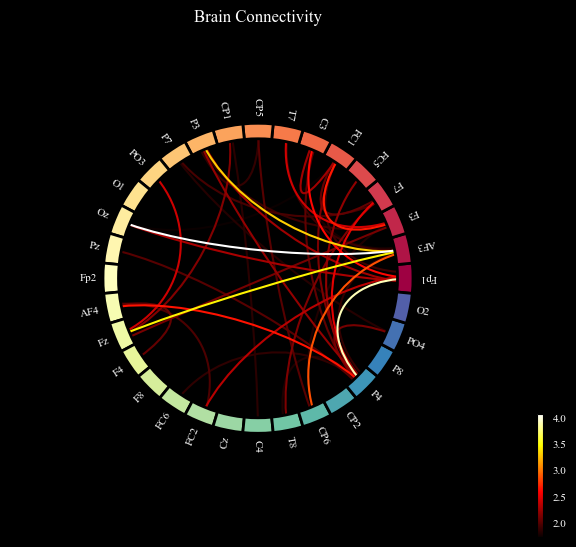

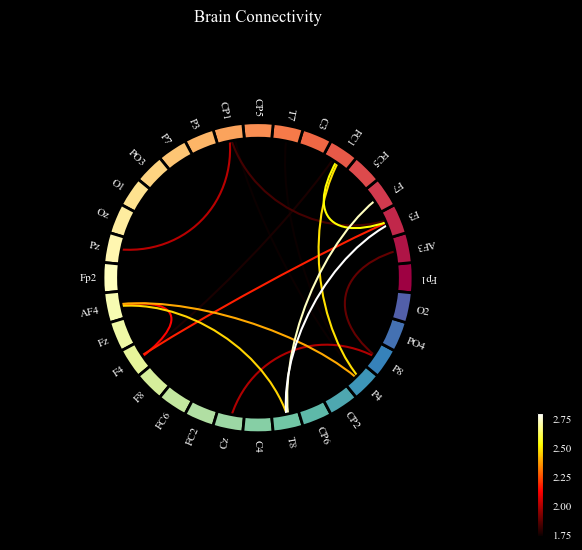

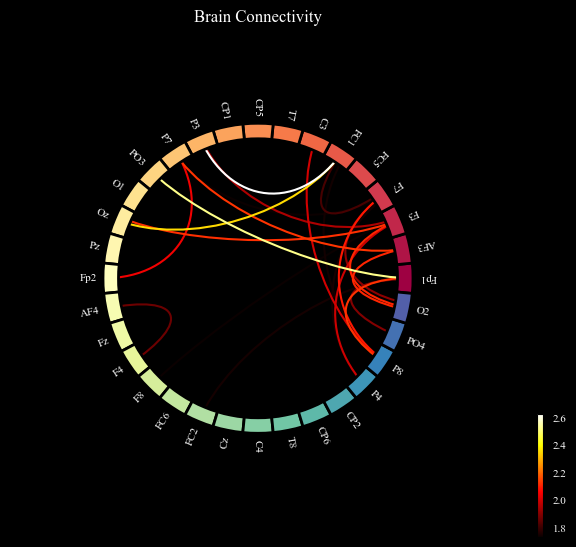

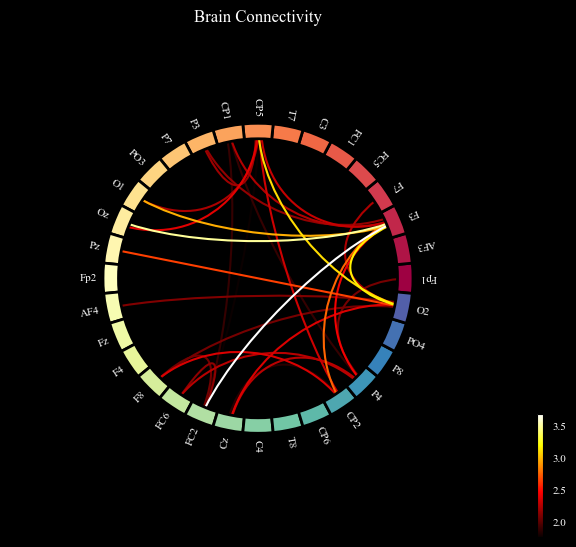

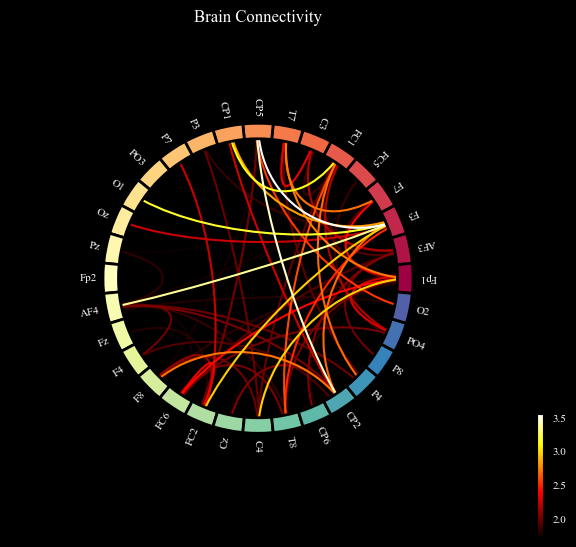

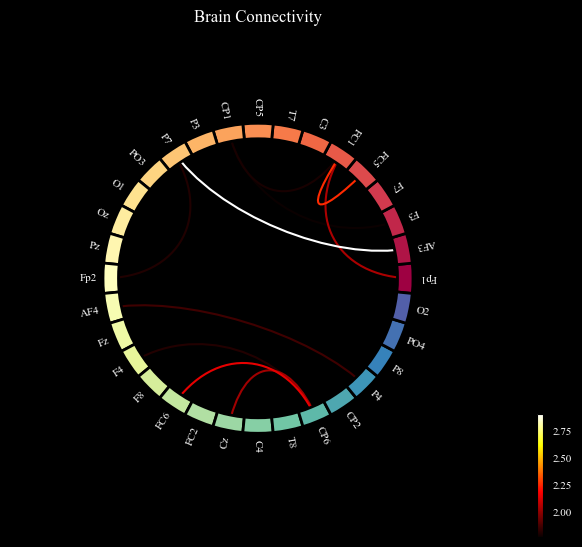

In [336]:
import numpy as np
import mne
import mne_connectivity
# valence_time_fourier_out = np.abs(valence_time_fourier_out)
time_fourier_out = np.abs(time_fourier_out)

# 绘制大脑不同位置之间的关联强度
for i in range(6):
    # filtered_connectivity = np.where(valence_time_fourier_out[i] > 1, valence_time_fourier_out[i], 0)
    mne_connectivity.viz.plot_connectivity_circle(time_fourier_out[i],eeg_channels,title='Brain Connectivity',show=True)

In [ ]:
fig = mne.viz.plot_alignment(mne.pick_info(epochs.info, picks), trans,
                             'fsaverage', subjects_dir=subjects_dir,
                             surfaces=[], coord_frame='mri')

brain = mne.viz.Brain('fsaverage', alpha=0.1, cortex='low_contrast',
                      subjects_dir=subjects_dir, units='m', figure=fig)
brain.add_volume_labels(aseg='aparc+aseg', labels=labels)
brain.show_view(azimuth=120, elevation=90, distance=0.25)

In [5]:
deapacc_valence = [0.9744,0.9725,0.9729]
facedacc_valence = [0.9698,0.9533,0.9533]
deapacc_arousal = [0.9811,0.9794,0.9767]
facedacc_arousal = [0.9583,0.9556,0.9491]

In [6]:
plt.rcParams['font.family']='Times New Roman'

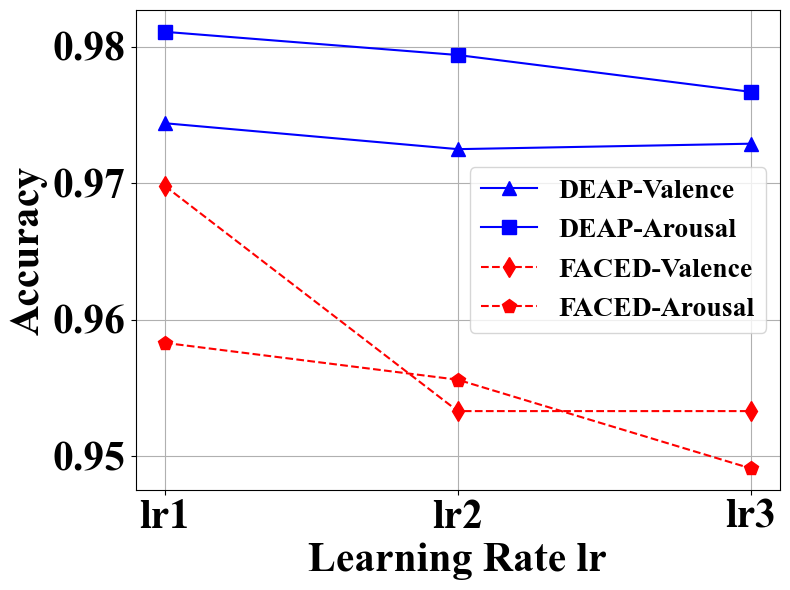

In [21]:
indices = range(1, 4)  # 或者直接用 list(range(1, 6))

# 创建图形并设置大小
plt.figure(figsize=(8, 6))

# 绘制第一组数据的折线图
plt.plot(indices,deapacc_valence, marker='^', markersize=10,linestyle='-', color='b', label='DEAP-Valence')
plt.plot(indices,deapacc_arousal, marker='s', markersize=10,linestyle='-', color='b', label='DEAP-Arousal')
# 绘制第二组数据的折线图
plt.plot(indices,facedacc_valence, marker='d', markersize=10,linestyle='--', color='r', label='FACED-Valence')
plt.plot(indices,facedacc_arousal, marker='p', markersize=10,linestyle='--', color='r', label='FACED-Arousal')

# 添加标签和标题
plt.xlabel('Learning Rate lr', fontsize=30,fontweight='bold')
plt.ylabel('Accuracy', fontsize=30,fontweight='bold')

# 设置纵坐标刻度为索引值
plt.xticks(indices,['lr1','lr2','lr3'], fontsize=30,fontweight='bold')
plt.yticks([0.95, 0.96, 0.97, 0.98],fontsize=30,fontweight='bold')
plt.legend(loc='best',prop={'size':20,'weight': 'bold'})
plt.grid(True)

plt.tight_layout()
plt.savefig('/home/sjf/eegall/dataex/params1.jpg',dpi=800)

In [22]:
deap_acc_valence = [0.9731,0.9737,0.9716,0.9728,0.9744]
deap_acc_arousal = [0.9721,0.9746,0.9732,0.9782,0.9811]
faced_acc_valence = [0.9523,0.9487,0.9489,0.9485,0.9479]
faced_acc_arousal = [0.9513,0.9431,0.9492,0.9532,0.9583]

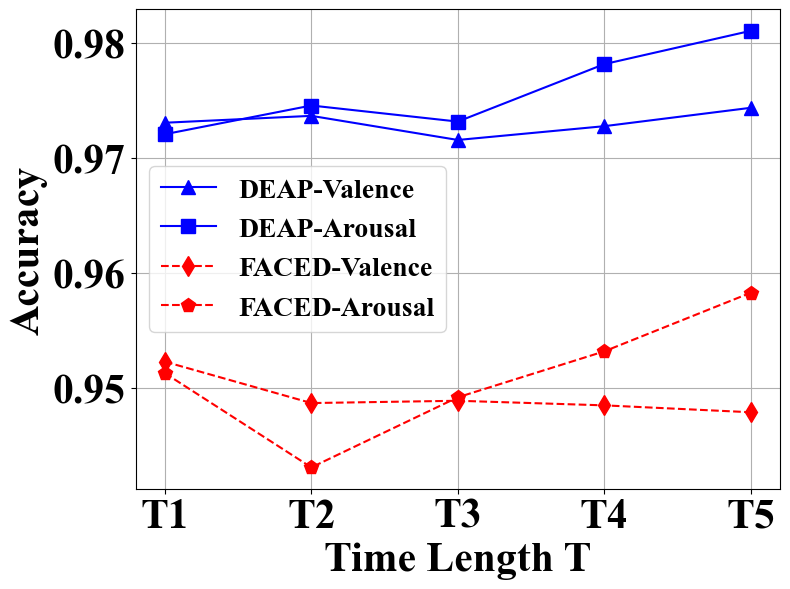

In [23]:
indices = range(1, 6)  # 或者直接用 list(range(1, 6))

# 创建图形并设置大小
plt.figure(figsize=(8, 6))

# 绘制第一组数据的折线图
plt.plot(indices,deap_acc_valence, marker='^', markersize=10,linestyle='-', color='b', label='DEAP-Valence')
plt.plot(indices,deap_acc_arousal, marker='s', markersize=10,linestyle='-', color='b', label='DEAP-Arousal')

# 绘制第二组数据的折线图
plt.plot(indices,faced_acc_valence, marker='d', markersize=10,linestyle='--', color='r', label='FACED-Valence')
plt.plot(indices,faced_acc_arousal, marker='p', markersize=10,linestyle='--', color='r', label='FACED-Arousal')

# 添加标签和标题
plt.xlabel('Time Length T', fontsize=30,fontweight='bold')
plt.ylabel('Accuracy', fontsize=30,fontweight='bold')
# plt.title('Accuracy Comparison Between Two Models', fontsize=16)

# 设置纵坐标刻度为索引值
plt.xticks(indices,['T1','T2','T3','T4','T5'], fontsize=30,fontweight='bold')
plt.yticks([0.95,0.96,0.97,0.98],fontsize=30,fontweight='bold')
plt.legend(loc='best',prop={'size':20,'weight': 'bold'})
plt.grid(True)



plt.tight_layout()
plt.savefig('/home/sjf/eegall/dataex/params2.jpg',dpi=800)

In [9]:
from sklearn.preprocessing import StandardScaler

In [2]:
def read_eeg_signal_from_file(filename):
    x = pickle._Unpickler(open(filename, 'rb'))
    x.encoding = 'latin1'
    p = x.load()
    return p

In [3]:
filepath = "/home/sjf/DEAP/data_preprocessed_python/data_preprocessed_python/raw/s01.dat"
trial = read_eeg_signal_from_file(filepath)
data = trial['data']
labels = trial['labels']

In [329]:
a = np.array([1.74,1.96,1.07,1.08,2.70,17.40,2.92,12.49])
b = np.array([2.23, 3.01, 2.56, 2.74, 3.26, 21.43, 3.99, 20.83])

In [330]:
b - a

array([0.49, 1.05, 1.49, 1.66, 0.56, 4.03, 1.07, 8.34])

In [11]:
scaler = StandardScaler()

In [32]:
stdata1 = scaler.fit_transform(data[0].T).T
stdata2 = scaler.fit_transform(data[10].T).T-3

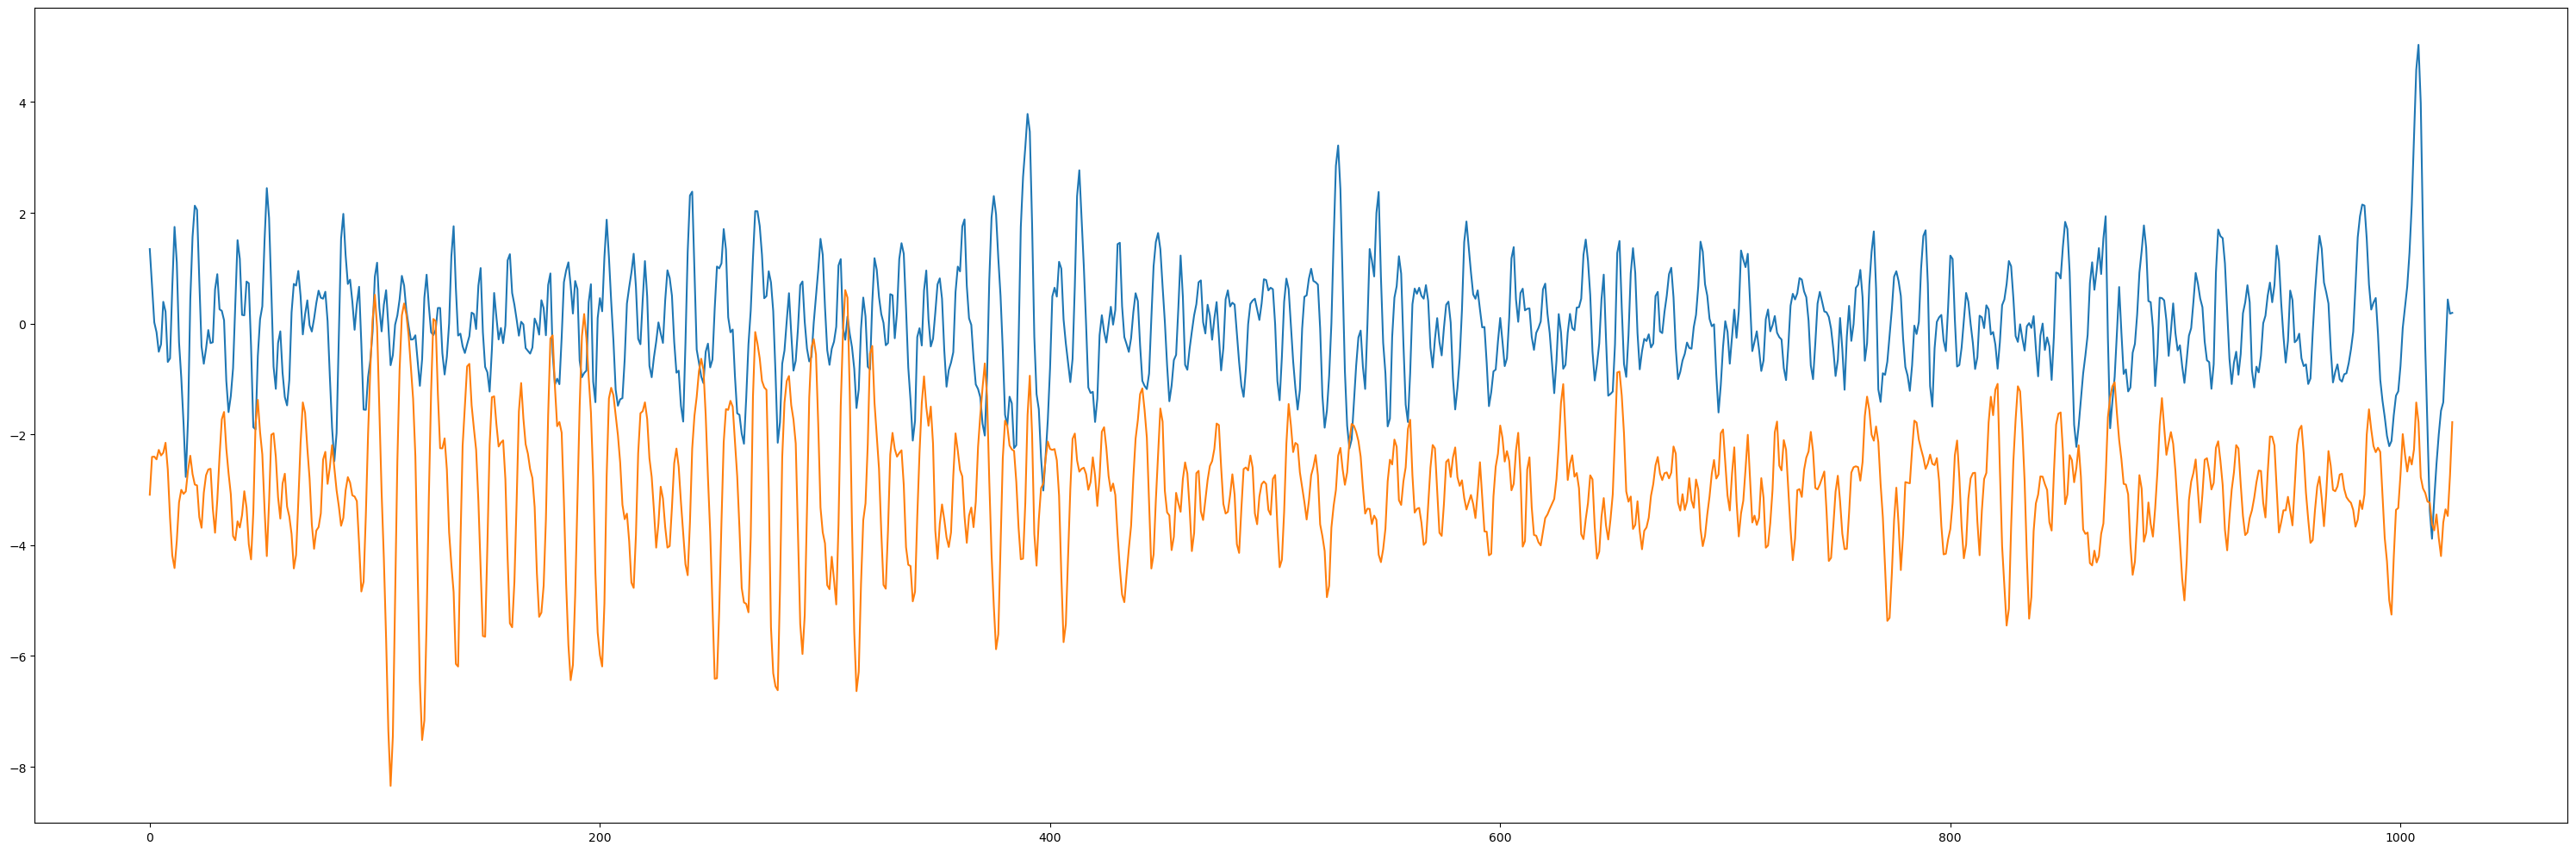

In [41]:
plt.figure(figsize=(30, 10))

plt.plot(stdata1[10,:1024])
plt.plot(stdata2[10,:1024])

plt.tight_layout()  # 自动调整子图间距

# 显示图像
plt.savefig('/home/sjf/eegall/dataex/signal.png',dpi=800)
plt.show()

In [43]:
import torch

In [44]:
graph = torch.load('/home/sjf/eegall/data/8nwrebase_graph.pt')

In [80]:
a = graph[2,0]+graph[2,0].T

In [51]:
scaler = StandardScaler()
stdata3 = scaler.fit_transform(a)

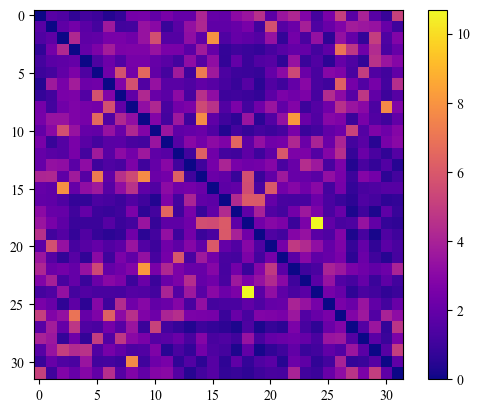

In [84]:
plt.rcParams['font.family']='Times New Roman'
plt.imshow(a, cmap='plasma', interpolation='nearest')
plt.colorbar()  # 显示颜色条
# plt.title('32x32 Heatmap')
plt.savefig('/home/sjf/eegall/dataex/heatmap.png',dpi=800)
plt.show()

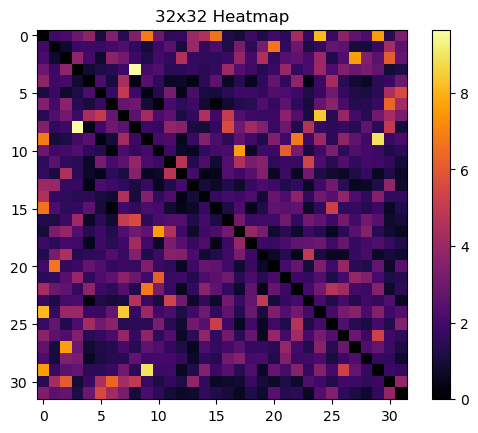

In [76]:
plt.imshow(a, cmap='inferno', interpolation='nearest')
plt.colorbar()  # 显示颜色条
plt.title('32x32 Heatmap')
plt.show()